<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
house = pd.read_csv('/Users/Jyots/Desktop/DSI-SF-4/datasets/housing_regression/housing.csv')

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [5]:
house['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

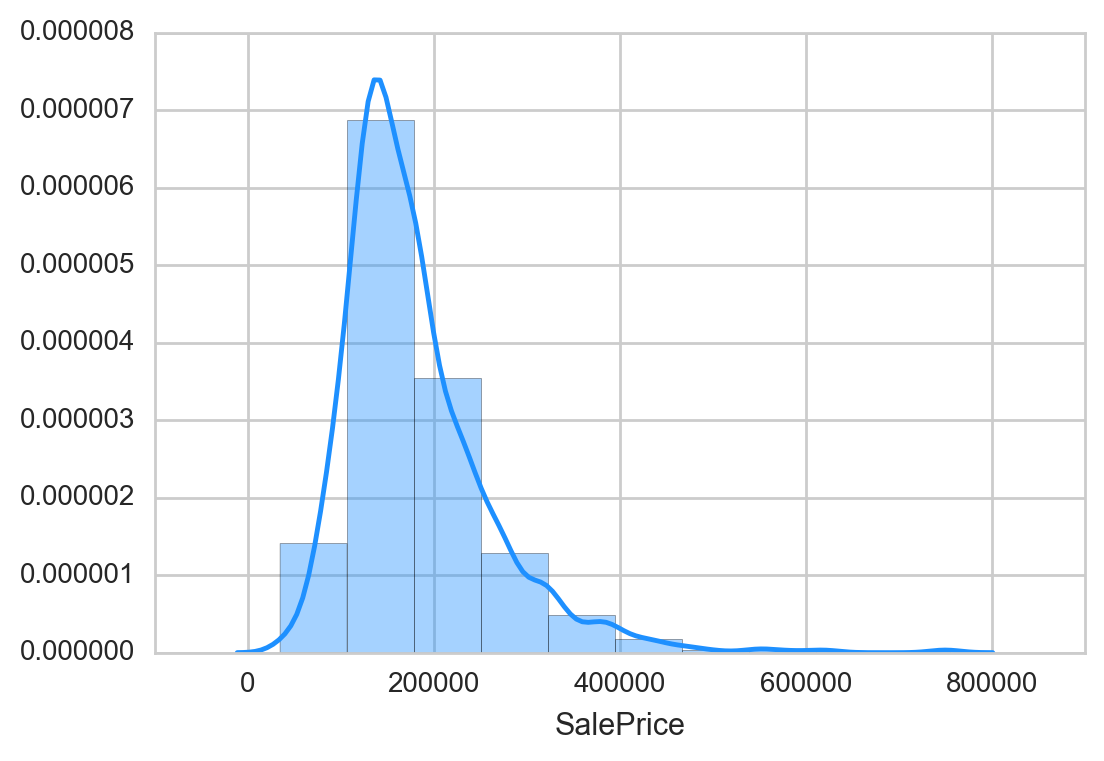

In [6]:
sns.distplot(house.SalePrice, bins = 10, color='dodgerblue')

In [7]:
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

In [8]:
sale_price_logtransformed = np.log(house.SalePrice)
sale_price_sqroot_transformed = (house.SalePrice)**0.5



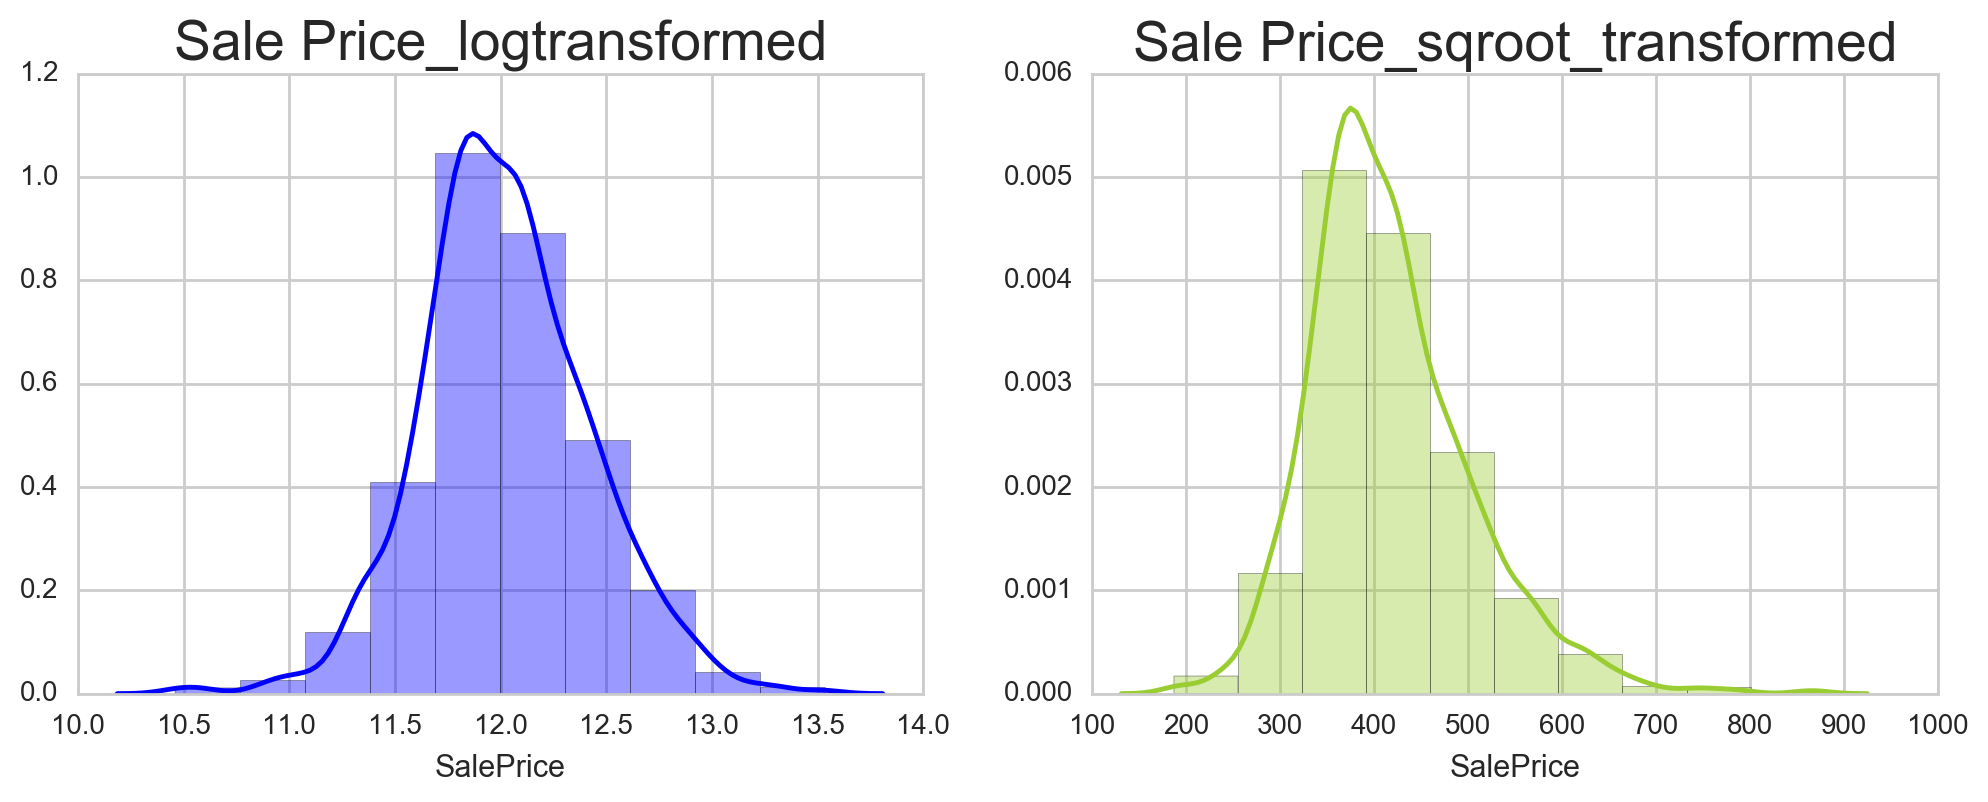

In [9]:
fig, axis_array = plt.subplots(1,2, figsize=(12,4)) 
axis1, axis2 = axis_array[0], axis_array[1]

sns.distplot(sale_price_logtransformed, bins = 10, ax=axis1, color ='blue')

sns.distplot(sale_price_sqroot_transformed, bins = 10, ax=axis2, color = 'yellowgreen')

axis1.set_title('Sale Price_logtransformed', fontsize=20)
axis2.set_title('Sale Price_sqroot_transformed', fontsize=20)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


In [10]:
house['age'] = house['YrSold'] - house['YearBuilt']
house.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [11]:
house['SalePrice_Transformed'] = house['SalePrice']**0.5


In [12]:
from scipy.stats.stats import pearsonr   
corr_age_sale_price = pearsonr(house['age'],house['SalePrice'])

corr_age_sale_price_Transformed = pearsonr(house['age'],house['SalePrice_Transformed'])

print corr_age_sale_price[0]
print corr_age_sale_price_Transformed[0]


-0.523350417547
-0.564853444443


In [ ]:
#The correlation between True Sale Price and House Age is similar to correlation between Transformed Sale Price and
# Age of the House with a difference of 0.04 in value.

### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

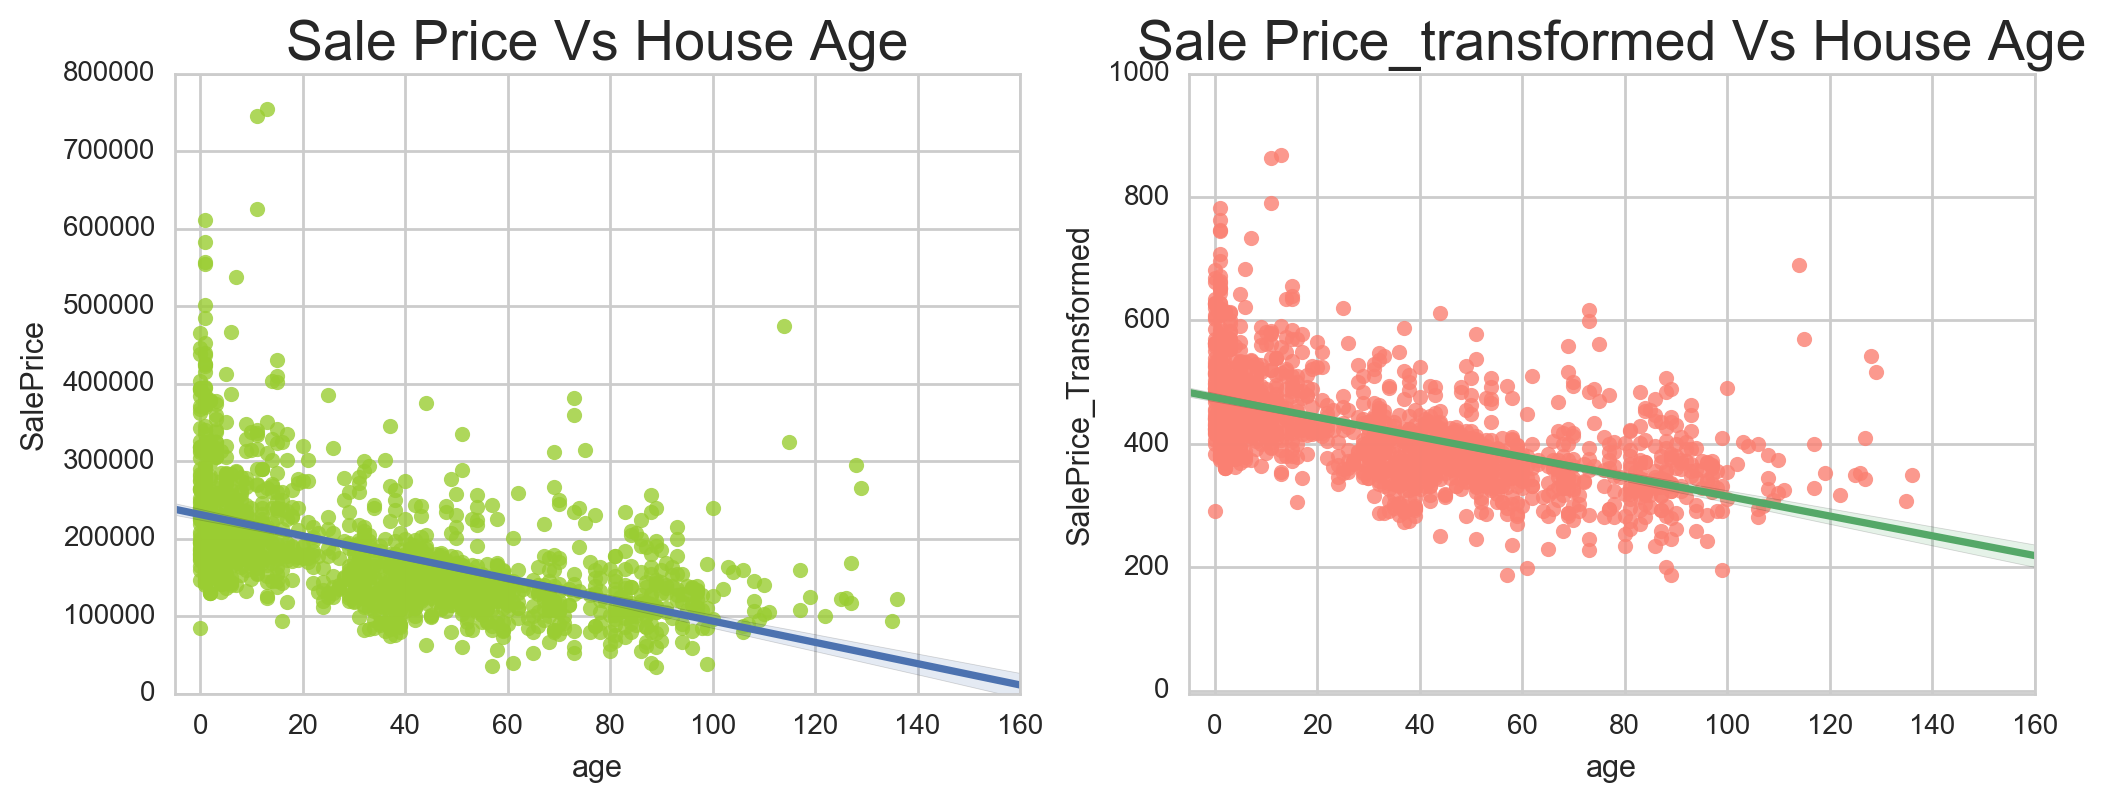

In [13]:
fig, axis_array = plt.subplots(1,2, figsize=(12,4)) 
axis1, axis2 = axis_array[0], axis_array[1]

axis1 = sns.regplot(x="age", y="SalePrice", data=house,
            scatter_kws={"color": 'yellowgreen',"s":30}, ax=axis1)

axis2 = sns.regplot(x="age", y="SalePrice_Transformed", data=house,
            scatter_kws={"color": 'salmon',"s":30}, ax=axis2)

axis1.set_title('Sale Price Vs House Age', fontsize=20)
axis2.set_title('Sale Price_transformed Vs House Age', fontsize=20)

axis1.set_xlim([-5,160])
axis1.set_ylim([0,800000])

axis2.set_xlim([-5,160])
axis2.set_ylim([-5,1000])



plt.show()

In [ ]:
# The Sale Price typically decreases with the increase in the age of the house. However, we observe few outliers for 
# which the sale price is higher for very old houses ~ 120 yrs and older. The trend is similar between the
# true Sale Price and transformed Sale Price.

### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

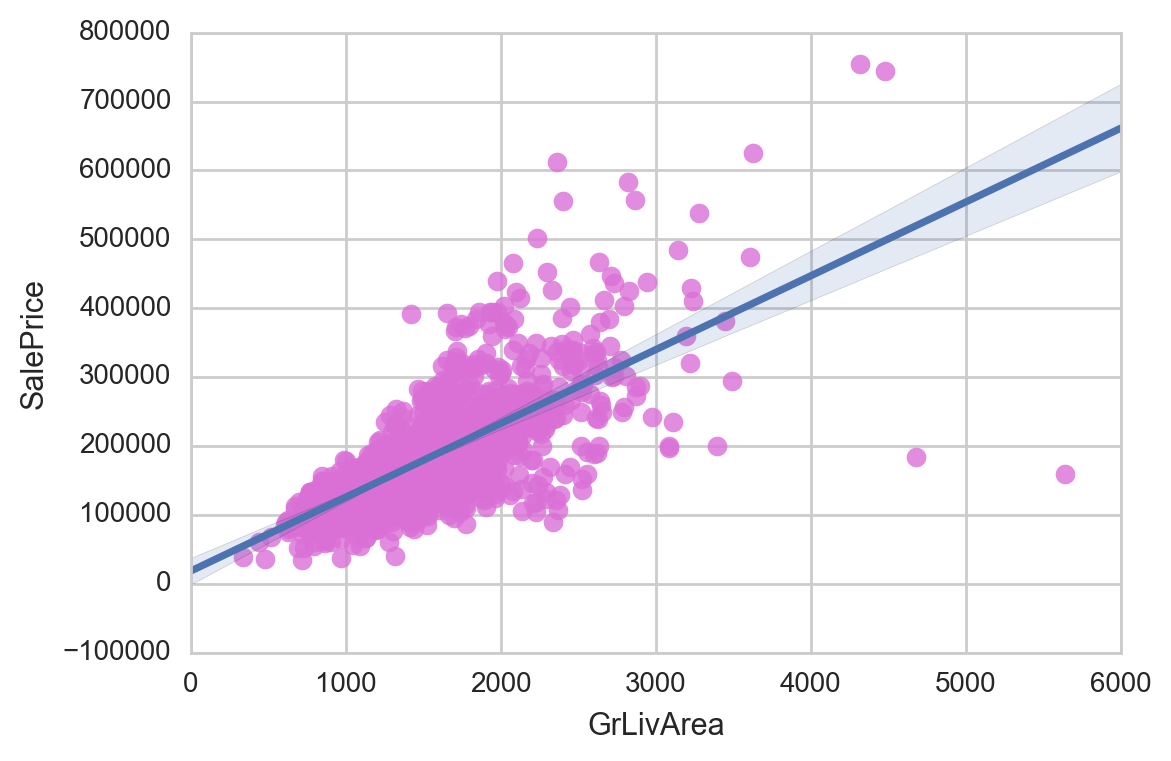

In [14]:
sns.regplot(x="GrLivArea", y="SalePrice", data=house,
            scatter_kws={"color": 'orchid',"s":50})

plt.show()

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

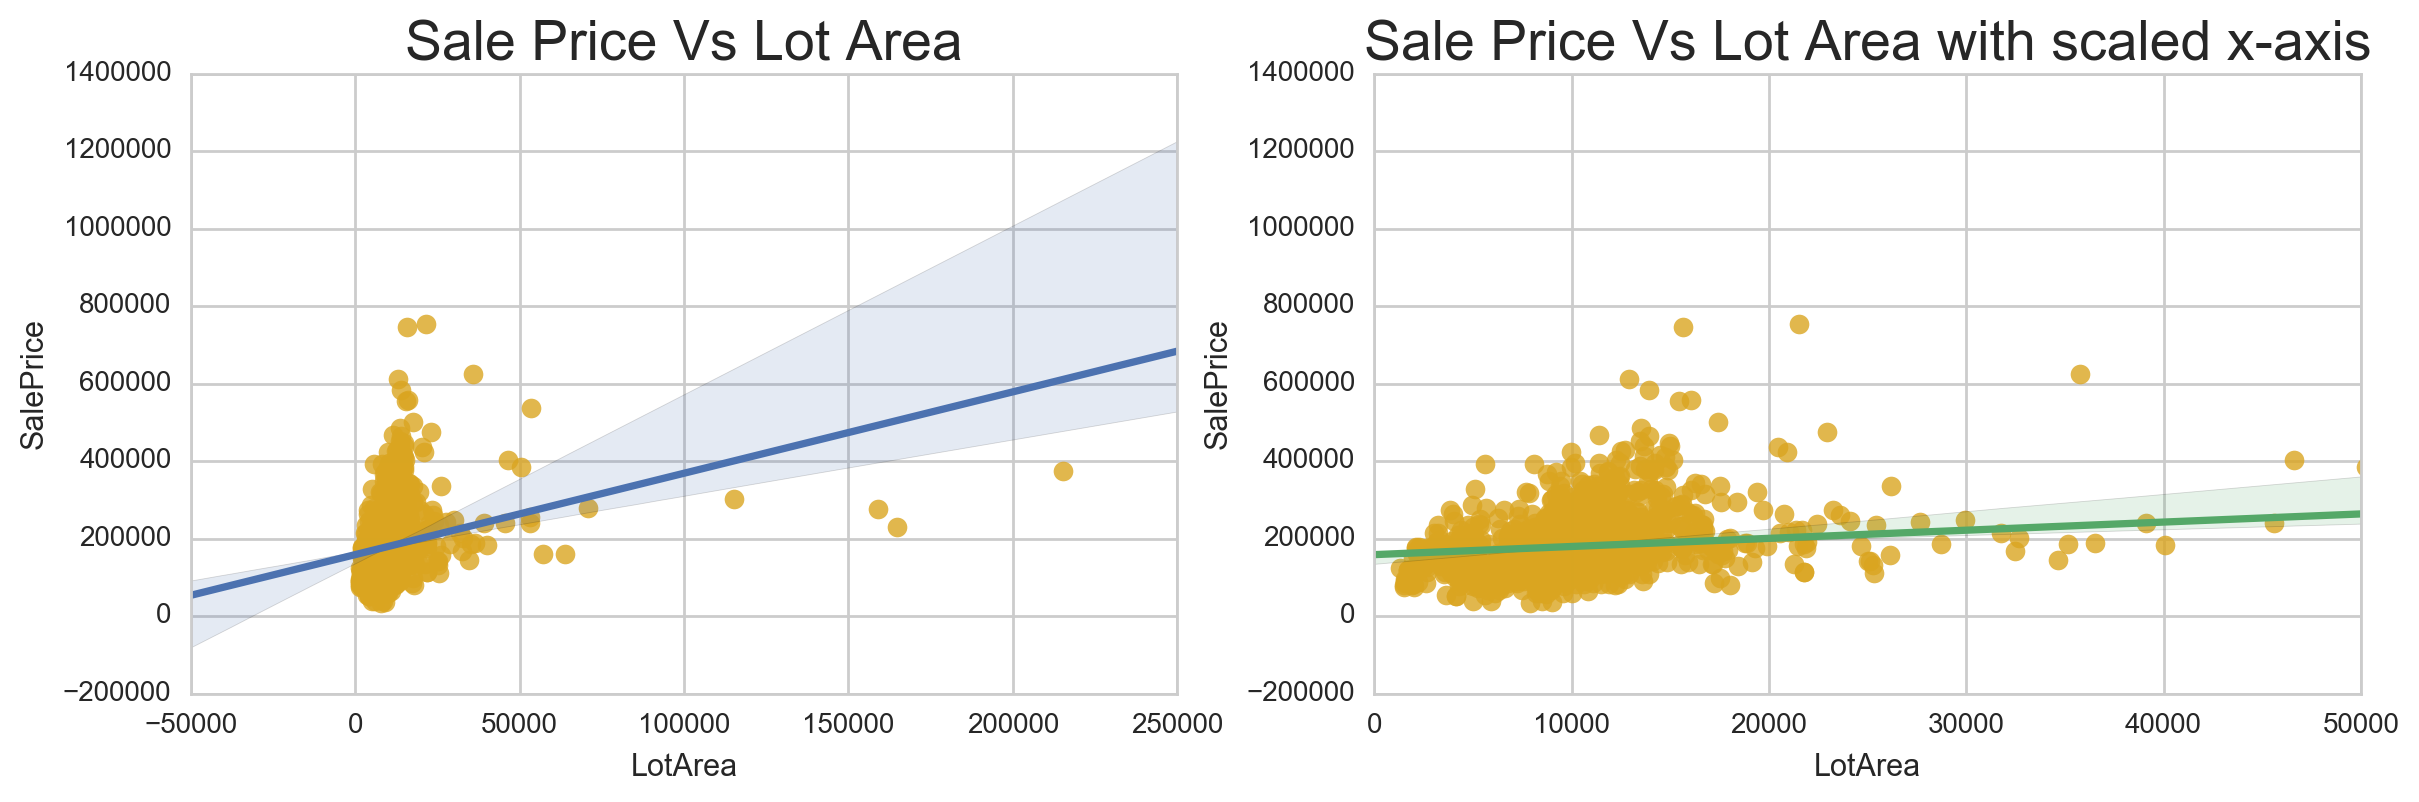

In [158]:
fig, axis_array = plt.subplots(1,2, figsize=(14,4))
axis1, axis2 = axis_array[0], axis_array[1]

axis1 = sns.regplot(x="LotArea", y="SalePrice", data=house,
            scatter_kws={"color": 'goldenrod',"s":50}, ax=axis1)

axis2 = sns.regplot(x="LotArea", y="SalePrice", data=house,
            scatter_kws={"color": 'goldenrod',"s":50}, ax=axis2)

axis1.set_title('Sale Price Vs Lot Area', fontsize=20)

axis2.set_xlim([0,50000])
axis2.set_title('Sale Price Vs Lot Area with scaled x-axis', fontsize=20)

plt.show()



In [ ]:
# I plotted SalePrice vs LotArea. I picked these 2 features because I had hypothesized that the Lot Area would
# have a similar effect on the Sale Price as the Grater Living Area. But apparently I was proven wrong.
# The effect of lot area on the sale price is positively linear but with a tiny slope. Sale Price does not increase
# significantly for Lot Area>30000 square feet. Maybe need to investigate the outliers.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

In [15]:
house['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [16]:
#house[house['MSZoning'] != 'C (all)']

In [17]:
res_house = house[house['MSZoning'] != 'C (all)']
res_house.shape

(1450, 83)

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [18]:
#res_house.isnull().sum()

In [19]:
res_house[['GarageCars','MiscFeature']][res_house['MiscFeature']=='Gar2']


,GarageCars,MiscFeature
346,1,Gar2
1230,2,Gar2


In [20]:
res_house.ix[346,'GarageCars'] = 2 
#updating the row where column Garage cars with 2 where it was 1 for MiscFeature == Gar2

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
res_house['GarageCars'][res_house['GarageCars'] == 2].count()

822

In [22]:
res_house = res_house.drop('PoolQC',1)
# The column PoolQC was dropped because 1443 cells out of 1450 had null value and there was no other column with 
#similar data for reference.

In [23]:
res_house.shape

(1450, 82)

In [24]:
#res_house[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']][res_house['GarageCars']==0]

In [25]:
#During investigation, I found that wherever 'GarageCars' = 0 and 'GarageArea' = 0
# 'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' is null. We will fill these cells with NA except
# GarageYrBlt will be filled with 0.0 for those rows.

In [26]:
res_house.loc[res_house['GarageCars'] == 0, 'GarageType'] = 'NA'
res_house.loc[res_house['GarageCars'] == 0, 'GarageYrBlt'] = 0
res_house.loc[res_house['GarageCars'] == 0, 'GarageFinish'] = 'NA'
res_house.loc[res_house['GarageCars'] == 0, 'GarageQual'] = 'NA'
res_house.loc[res_house['GarageCars'] == 0, 'GarageCond'] = 'NA'

        

In [27]:
res_house[['Exterior1st','Exterior2nd','MasVnrType','MasVnrArea']][res_house['MasVnrArea'].isnull()]

,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea
234,VinylSd,VinylSd,NaN,NaN
529,Wd Sdng,Stone,NaN,NaN
650,CemntBd,CmentBd,NaN,NaN
936,VinylSd,VinylSd,NaN,NaN
973,CemntBd,CmentBd,NaN,NaN
977,VinylSd,VinylSd,NaN,NaN
1243,VinylSd,VinylSd,NaN,NaN
1278,VinylSd,VinylSd,NaN,NaN


In [28]:
res_house.loc[res_house['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
res_house.loc[res_house['MasVnrArea'].isnull(), 'MasVnrArea'] = 0.0


In [29]:
res_house.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [30]:
#res_house[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
#         'TotalBsmtSF']][res_house['BsmtExposure'].isnull()]

# The number of missing values were same for each of the columns listed above except for 'BsmtExposure'. It had one
# extra missing value. On investigation, I found out that the missing values corresponded to residential units with
# no basements. The one extra missing value in BsmtExposure was filled with 'No' - 'No Exposure'.

In [31]:
res_house.ix[948,'BsmtExposure'] = 'No'

res_house.loc[res_house['BsmtQual'].isnull(), 'BsmtQual'] = 'NA'
res_house.loc[res_house['BsmtCond'].isnull(), 'BsmtCond'] = 'NA'
res_house.loc[res_house['BsmtExposure'].isnull(), 'BsmtExposure'] = 'NA'
res_house.loc[res_house['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'NA'
res_house.loc[res_house['BsmtFinType2'].isnull(), 'BsmtFinType2'] = 'NA'

In [32]:
#res_house[['Fireplaces','FireplaceQu']][res_house['FireplaceQu'].isnull()]
res_house.loc[res_house['FireplaceQu'].isnull(), 'FireplaceQu'] = 'NA'

#The missing values in 'FireplaceQu' were present where 'Fireplaces' = 0. So 'NA' was filled in the cells in
# 'FireplaceQu' with missing values.

In [33]:
res_house = res_house.drop('Fence',1)

# Fence showed the fence quality, this feature had 1172 missing values

In [34]:
#res_house[['LotFrontage','LotArea']][res_house['LotFrontage'].notnull()]

res_house["LotFrontage"].fillna(res_house["LotFrontage"].mean(), inplace=True)


#fil the missing values with the mean of the column 'LotFrontage' which is the linear street in feet connected
#to the property.


In [35]:
#res_house[['MiscVal','MiscFeature']][res_house['MiscFeature'].isnull()]
res_house.loc[res_house['MiscVal'] == 0, 'MiscFeature'] = 'NA'


In [36]:
#res_house[['Street','Alley']][res_house['Street']== 'Grvl']
res_house.loc[res_house['Street'] == 'Pave', 'Alley'] = 'Pave'
res_house.loc[res_house['Street'] == 'Grvl', 'Alley'] = 'Grvl'


#Alley access was matched to street access for each type. This is based on the reasoning that when the access roads
# were being made, they would have used the same features for each type of access road.


In [37]:
#res_house.isnull().sum()
#res_house.tail()

### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [38]:
res_house_mod = res_house.drop('Street',1)
res_house_mod = res_house.drop('Alley',1)

# Street and Alley columns were removed because all the rows except 2 were 'Pave' in streets and so were the cells
# in the Alley column.So it was pretty common feature across all the residence types.

In [39]:
#res_house_mod['Utilities'][res_house_mod['Utilities']=='NoSeWa']
res_house_mod = res_house.drop('Utilities',1)

# The Utilities feature was dropped beacuase all the rows except 1 had 'AllPub' in that feature, so it was almost a 
#constant feature.

In [40]:
#res_house_mod['LandContour'].unique()
#res_house_mod['LandContour'][res_house_mod['LandContour']=='Lvl'].value_counts()
res_house_mod = res_house_mod.drop('LandContour',1)

# This feature was dropped because around 90% of the observations in this feature are constant.

In [41]:
#res_house_mod['RoofMatl'][res_house_mod['RoofMatl']=='CompShg'].value_counts()
res_house_mod = res_house_mod.drop('RoofMatl',1)

#Roof Material feature was dropped as 1424 observations out of 1450 had a single entry.

In [42]:
res_house_mod.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age,SalePrice_Transformed
Id,1.000000,0.015291,-0.010347,-0.034304,-0.030440,0.010907,-0.017656,-0.021695,-0.052487,-0.003892,...,0.007034,-0.047043,0.002628,0.057108,-0.007071,0.025820,-0.000176,-0.024353,0.017624,-0.024199
MSSubClass,0.015291,1.000000,-0.358472,-0.139725,0.028891,-0.063504,0.030056,0.035989,0.023617,-0.074762,...,-0.011016,-0.044032,-0.030057,0.008308,-0.007172,-0.015808,-0.019356,-0.087487,-0.030869,-0.086144
LotFrontage,-0.010347,-0.358472,1.000000,0.306508,0.238974,-0.050316,0.118896,0.082554,0.179468,0.218682,...,0.011102,0.062546,0.038383,0.181500,-0.000580,0.009665,0.005451,0.337567,-0.118492,0.343915
LotArea,-0.034304,-0.139725,0.306508,1.000000,0.106457,-0.006074,0.012958,0.013475,0.103071,0.214794,...,-0.016954,0.020349,0.043435,0.077652,0.037468,0.001500,-0.013579,0.264715,-0.013539,0.266859
OverallQual,-0.030440,0.028891,0.238974,0.106457,1.000000,-0.107874,0.567392,0.544850,0.405799,0.235139,...,-0.104417,0.029411,0.062759,0.065112,-0.030910,0.078088,-0.024962,0.789031,-0.567712,0.814156
OverallCond,0.010907,-0.063504,-0.050316,-0.006074,-0.107874,1.000000,-0.390446,0.067475,-0.130376,-0.053095,...,0.079229,0.025010,0.053216,-0.002421,0.069996,0.003308,0.046202,-0.089084,0.391947,-0.076954
YearBuilt,-0.017656,0.030056,0.118896,0.012958,0.567392,-0.390446,1.000000,0.590105,0.308690,0.248222,...,-0.380911,0.030387,-0.051326,0.004250,-0.034681,0.017254,-0.009111,0.517602,-0.999026,0.558832
YearRemodAdd,-0.021695,0.035989,0.082554,0.013475,0.544850,0.067475,0.590105,1.000000,0.173008,0.123137,...,-0.187094,0.044605,-0.042288,0.005259,-0.009716,0.023540,0.040420,0.501186,-0.587510,0.538552
MasVnrArea,-0.052487,0.023617,0.179468,0.103071,0.405799,-0.130376,0.308690,0.173008,1.000000,0.260390,...,-0.106982,0.018708,0.062015,0.011671,-0.029415,-0.004747,-0.006922,0.471056,-0.308570,0.454778
BsmtFinSF1,-0.003892,-0.074762,0.218682,0.214794,0.235139,-0.053095,0.248222,0.123137,0.260390,1.000000,...,-0.098826,0.026138,0.059746,0.140668,0.004120,-0.017519,0.018654,0.384475,-0.247058,0.381491


In [43]:
house_data = res_house_mod[['LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF','BsmtFinSF1',
                          '1stFlrSF','2ndFlrSF','GrLivArea','KitchenQual','BsmtFullBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageCars',
                          'GarageArea','WoodDeckSF','age','OpenPorchSF','SalePrice_Transformed']]

# In the preprocessing phase, I have eliminated all features that have a correlation of less than abs (0.25) with the 
#SalePrice based on above matrix. Generally, strong correlation is int he range of abs(0.5) - abs(1).

In [44]:
house_data.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,age,OpenPorchSF,SalePrice_Transformed
0,8450,7,2003,2003,196.0,856,706,856,854,1710,...,2,1,8,0,2,548,0,5,61,456.618002
1,9600,6,1976,1976,0.0,1262,978,1262,0,1262,...,2,0,6,1,2,460,298,31,0,426.028168
2,11250,7,2001,2002,162.0,920,486,920,866,1786,...,2,1,6,1,2,608,0,7,42,472.757866
3,9550,7,1915,1970,0.0,756,216,961,756,1717,...,1,0,7,1,3,642,0,91,35,374.165739
4,14260,8,2000,2000,350.0,1145,655,1145,1053,2198,...,2,1,9,1,3,836,192,8,84,500.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

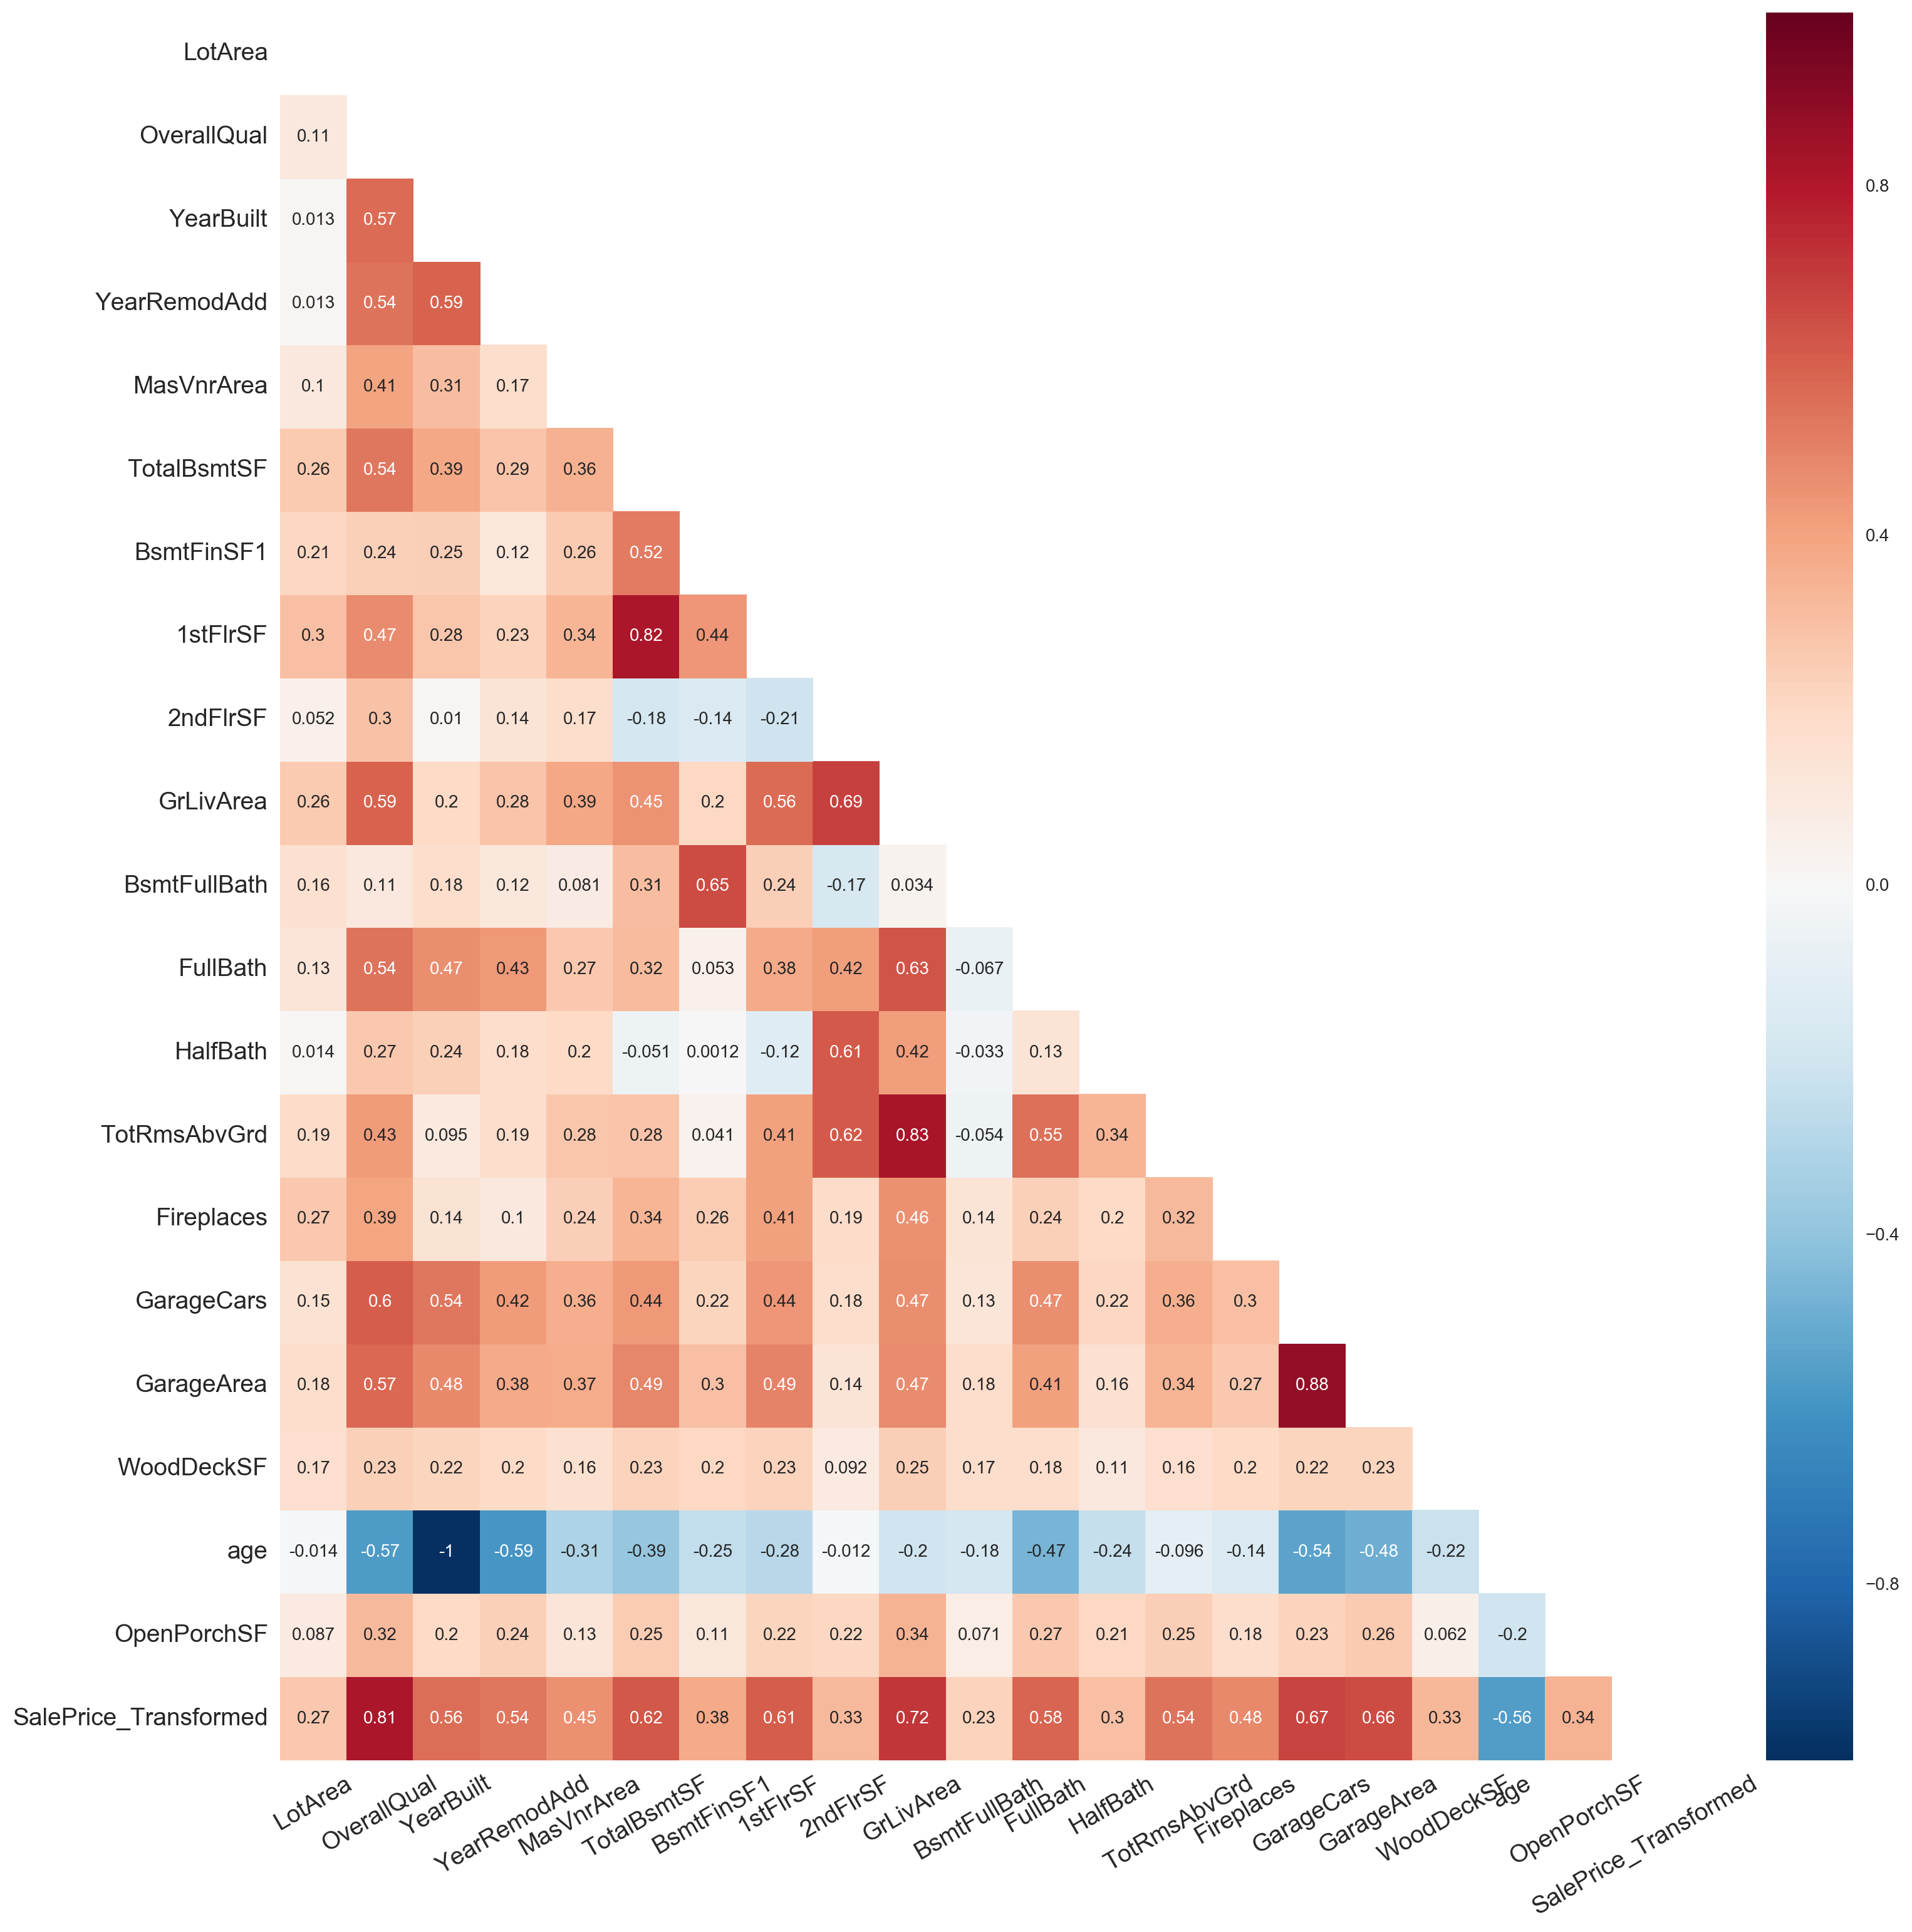

In [46]:
def correlation_heat_map(house_data):
    corrs = house_data.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(18,18))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(house_data)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

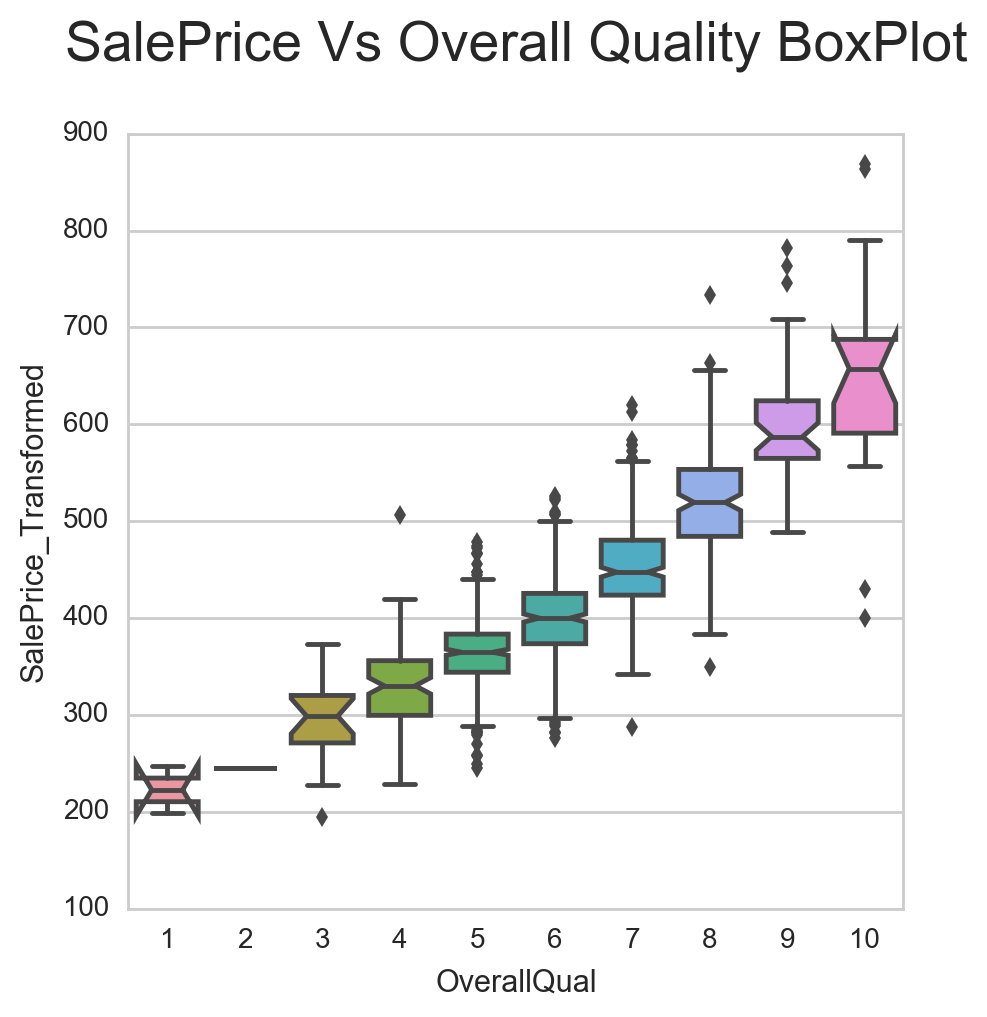

In [159]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()



ax = sns.boxplot(x='OverallQual', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs Overall Quality BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# The Sale Price increases with the Over All Quality of the House which is expected and hence no deviation from the
#trend.

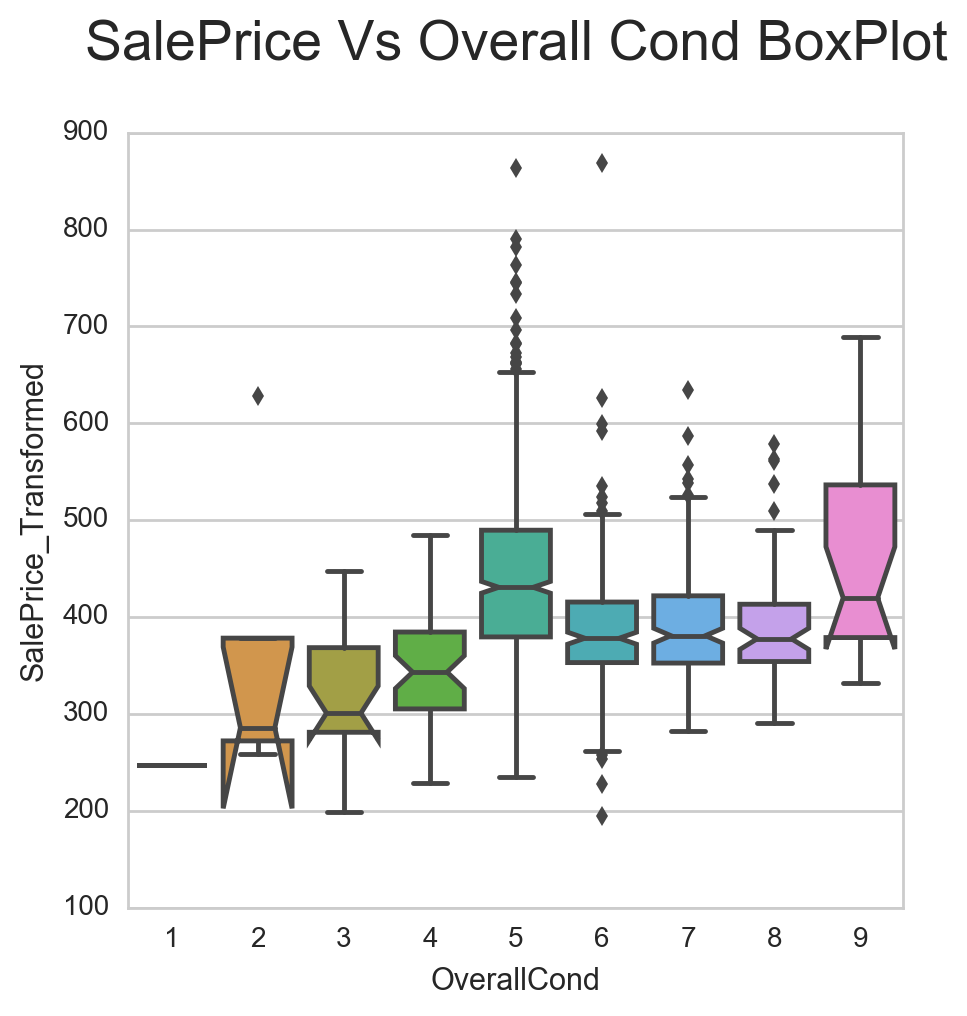

In [160]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='OverallCond', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs Overall Cond BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
#However, the Sale Price is almost constant for Over All Condition of the House above 5 which is quite surprising.
# It increases from 1 to 5,s tays constant till 8 and slightly increases at OverAll Condition = 9.

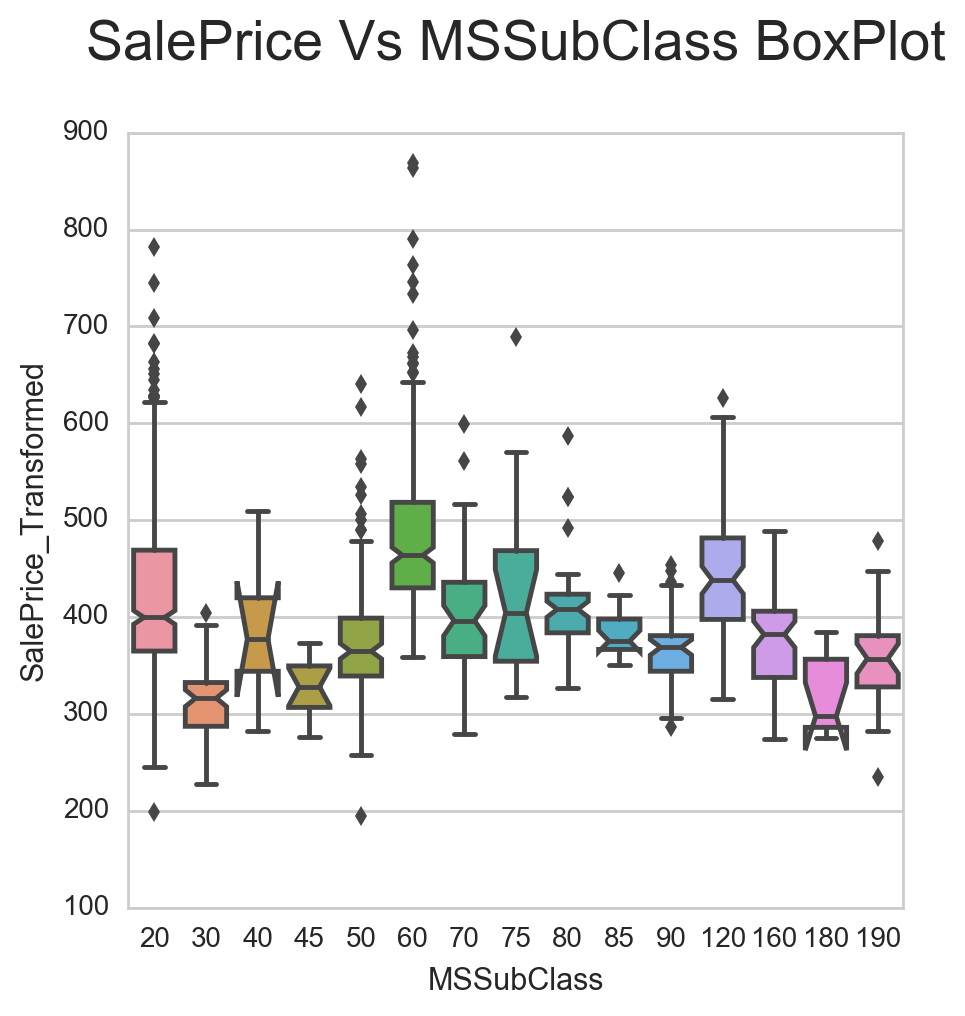

In [161]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='MSSubClass', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs MSSubClass BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# MSSubclass identifies the type of dwelling involved in the sale. The Sale Price is highest for 2-story units 
#built after 1946.It is lowest for Planned Unit Developments with split levels/foyers.

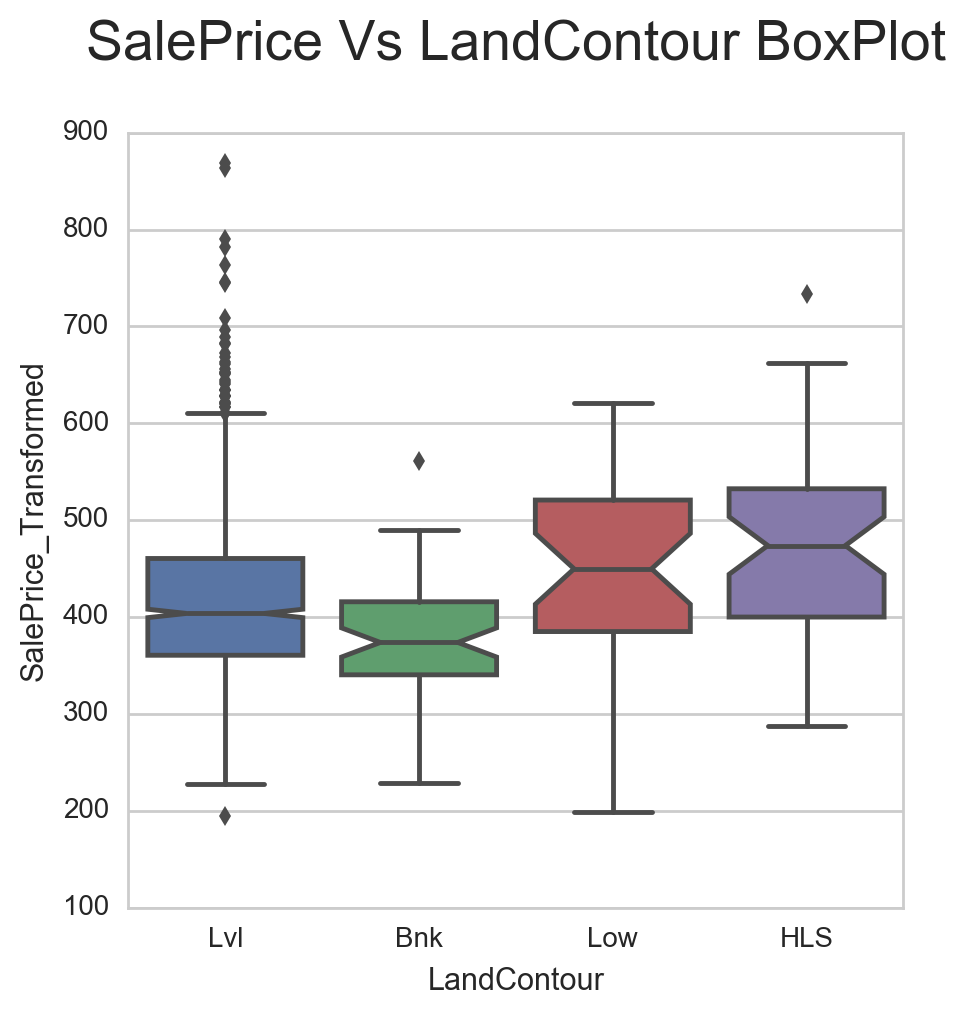

In [162]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='LandContour', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs LandContour BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# Houses on Hills with slopes on either side are priced highest probably because of better view and privacy while
# while houses with land contour =Bnk are priced lowest probably because of proximity to the street, noise etc.

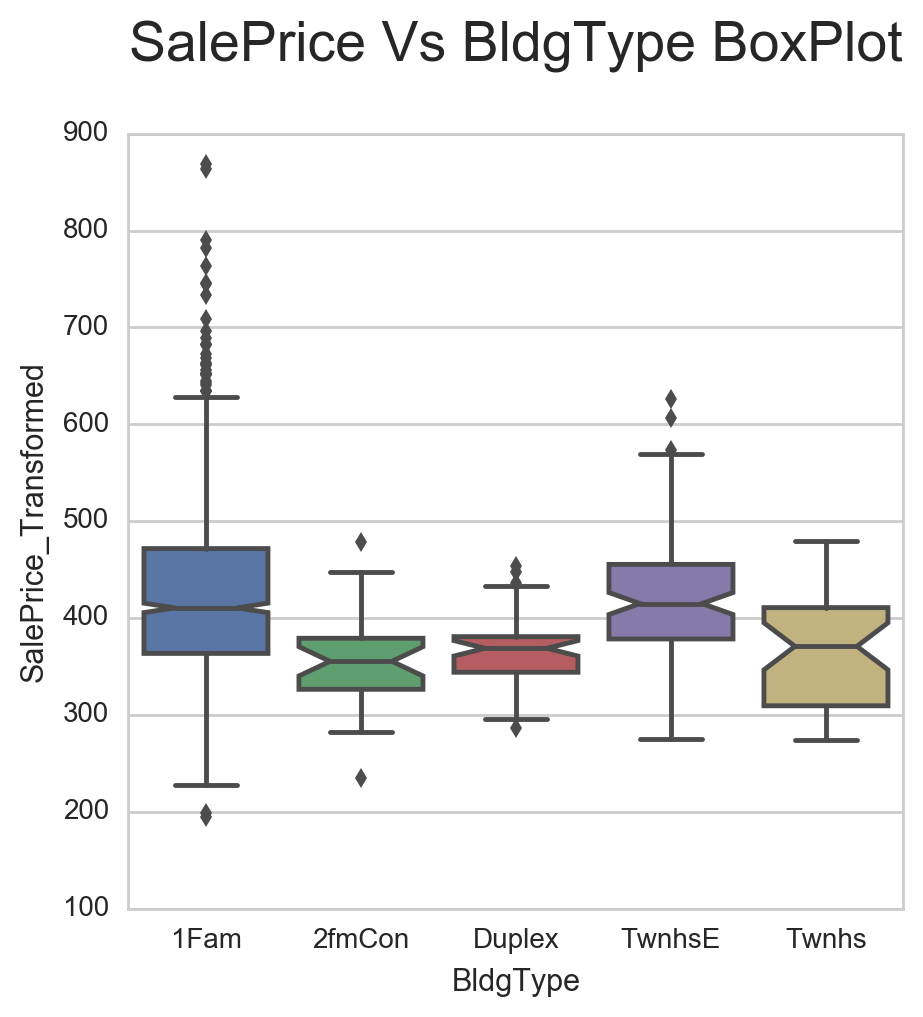

In [163]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='BldgType', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs BldgType BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# We do not see a lot of variation here.However, the Surprise element is that the Town Homes that are end units are
# priced higher than single family detached home.

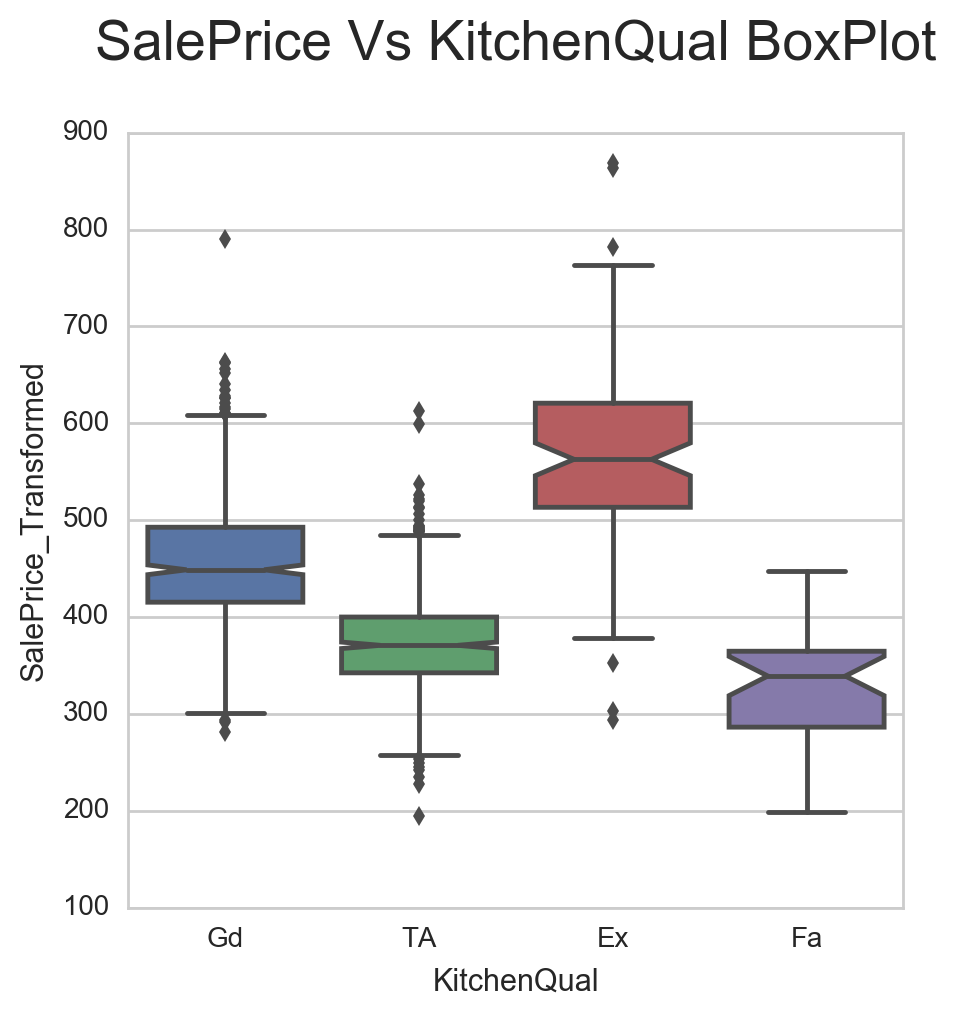

In [164]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='KitchenQual', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs KitchenQual BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# This is quite predictable relationship. 

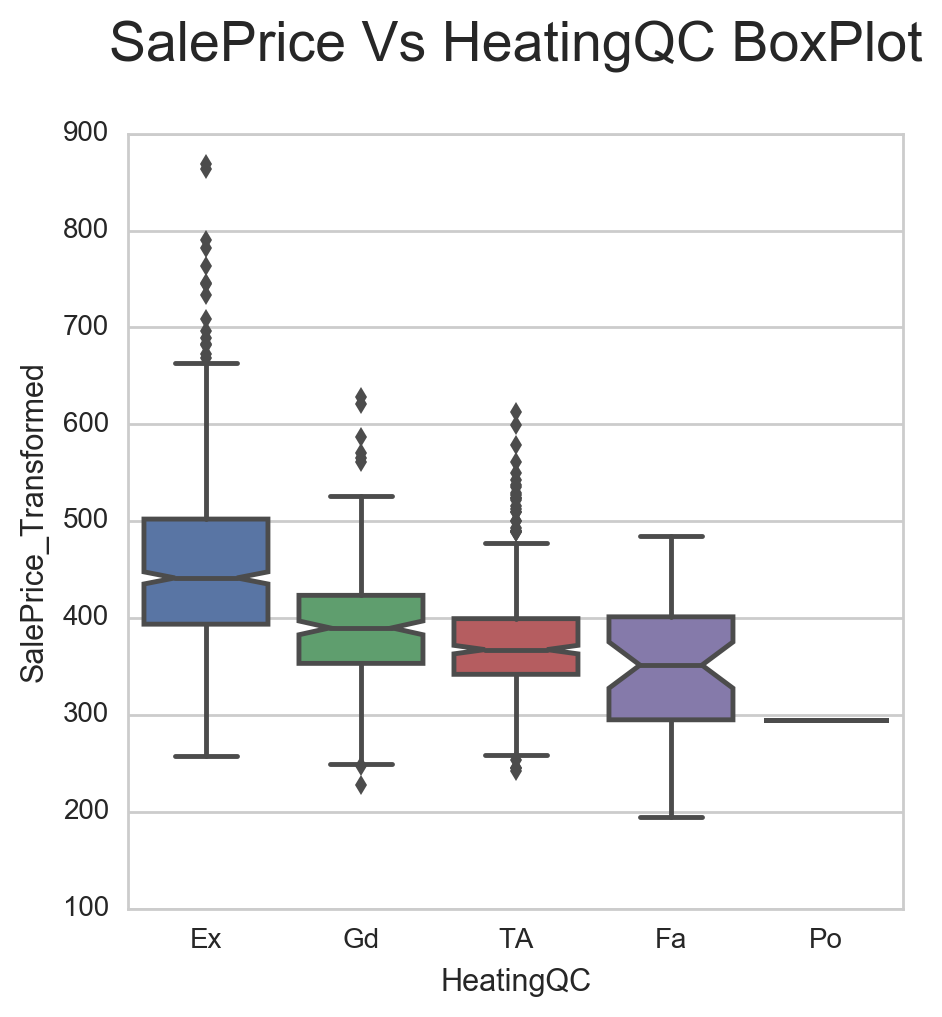

In [165]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='HeatingQC', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs HeatingQC BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# Very Predictable trend.

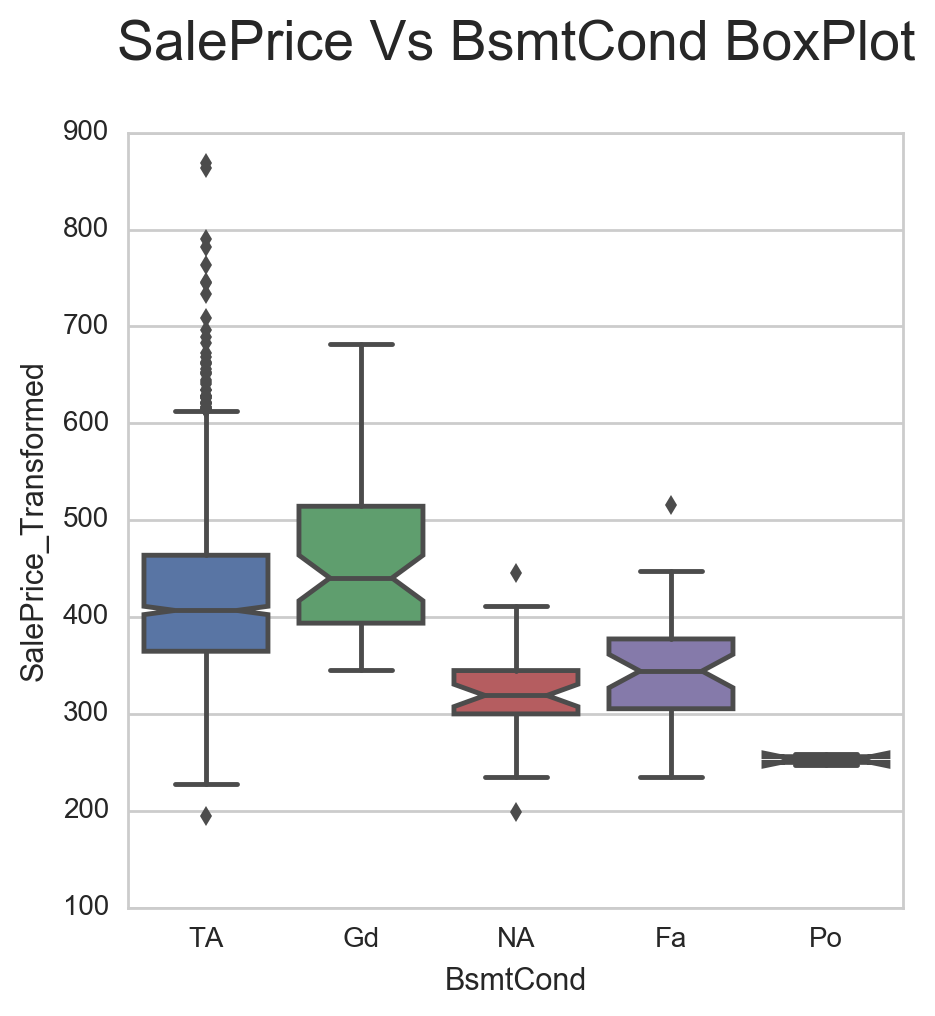

In [166]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='BsmtCond', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs BsmtCond BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# Houses with basement have higher prices. AMong the houses with basements, the Sale Price increases with the
# Basement COndition.However for a basement of poor quality, the Sale Price is lower than the house with no basement.

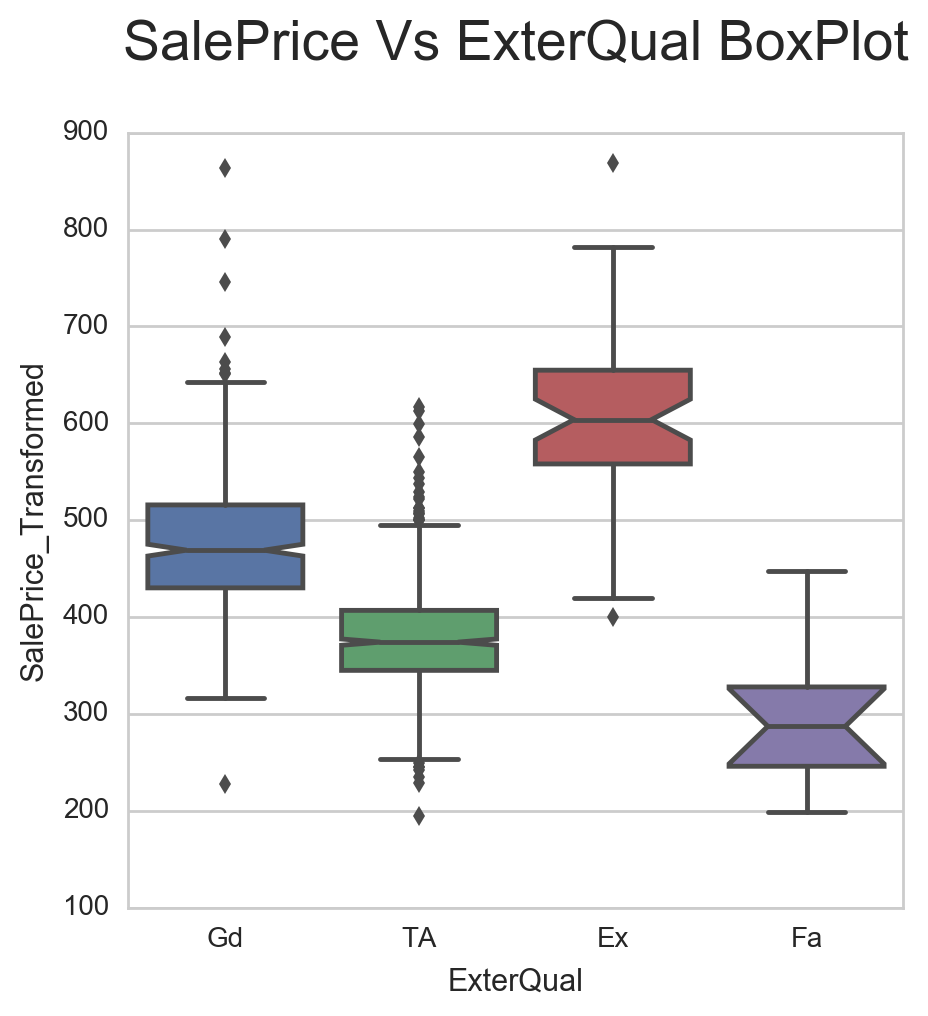

In [167]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='ExterQual', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs ExterQual BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# No brainer

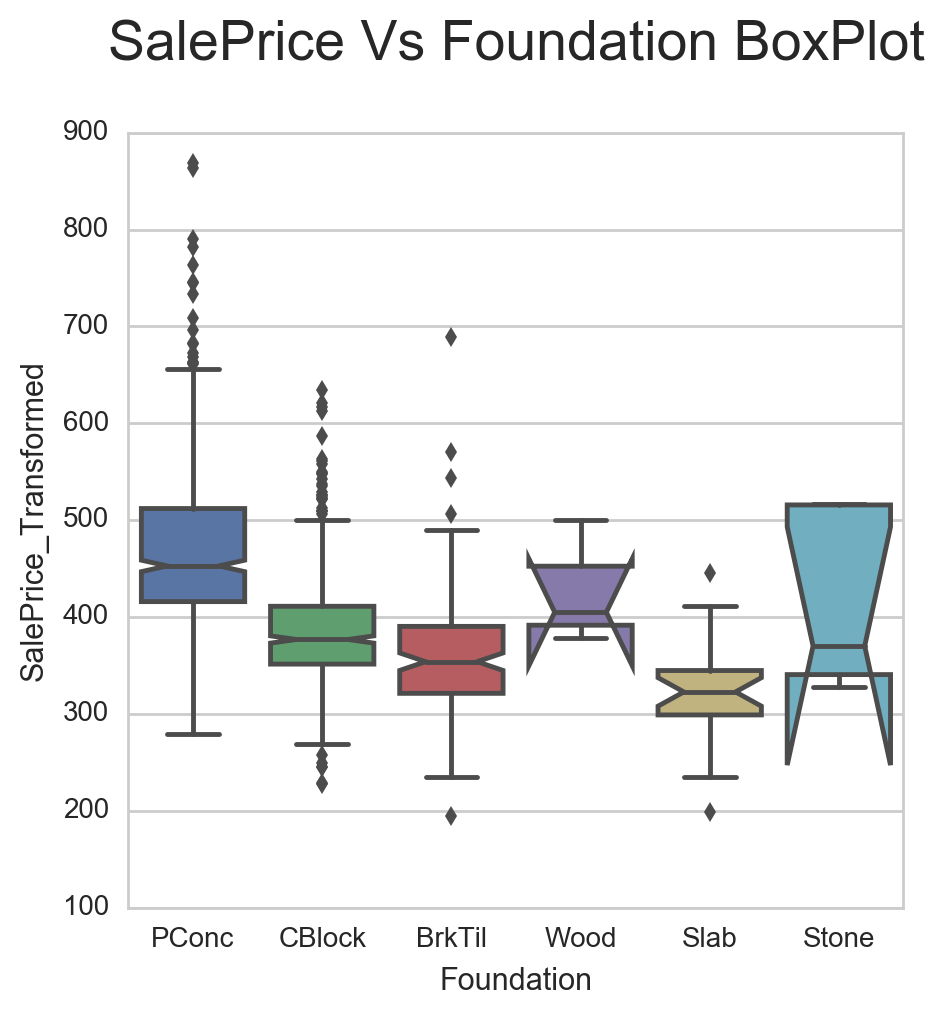

In [168]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

ax = sns.boxplot(x='Foundation', y ='SalePrice_Transformed', data=res_house, ax=ax, notch=True)

ax.set_title('SalePrice Vs Foundation BoxPlot\n', fontsize=20)

plt.show()

In [ ]:
# The Poured Concrete foundation apparently seems to be in higher demand by buyers.
# It is interesting to know that Wood foundation comes second to PConcrete.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


In [57]:
house_data.head(2)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,age,OpenPorchSF,SalePrice_Transformed
0,8450,7,2003,2003,196.0,856,706,856,854,1710,...,2,1,8,0,2,548,0,5,61,456.618002
1,9600,6,1976,1976,0.0,1262,978,1262,0,1262,...,2,0,6,1,2,460,298,31,0,426.028168


### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

In [ ]:
#The intercept coefficient : It is the expected mean value of y when all predctors or x values are 0.

#The coefficient on GrLivArea : It is the weight attached to the feature GrLivArea which indicates by how much
# the feature affects the predicted value of the target variable which is the Sale Price in this case.

# The R-squared value : R-squared is a statistical measure of how close the data are to the fitted regression line.
#It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple 
#regression.It is the percentage of the response variable variation that is explained by a linear model.
#0% indicates that the model explains none of the variability of the response data around its mean.
    
#The p-value for coefficients (P>|t|) :The p-value for each term tests the null hypothesis that the coefficient is 
#equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words,
#a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the 
#predictor's value are related to changes in the response variable.
#The t statistic is the coefficient divided by its standard error. The standard error is an estimate of the standard 
#deviation of the coefficient, the amount it varies across cases. It can be thought of as a measure of the precision 
#with which the regression coefficient is measured. If a coefficient is large compared to its standard error, then it 
#is probably different from 0.If 95% of the t distribution is closer to the mean than the t-value on the coefficient 
#you are looking at, then you have a P value of 5%. This is also reffered to a significance level of 5%. 
#The size of the P value for a coefficient says nothing about the size of the effect that variable is having on your 
#dependent variable - it is possible to have a highly significant result (very small P-value) for a miniscule effect.




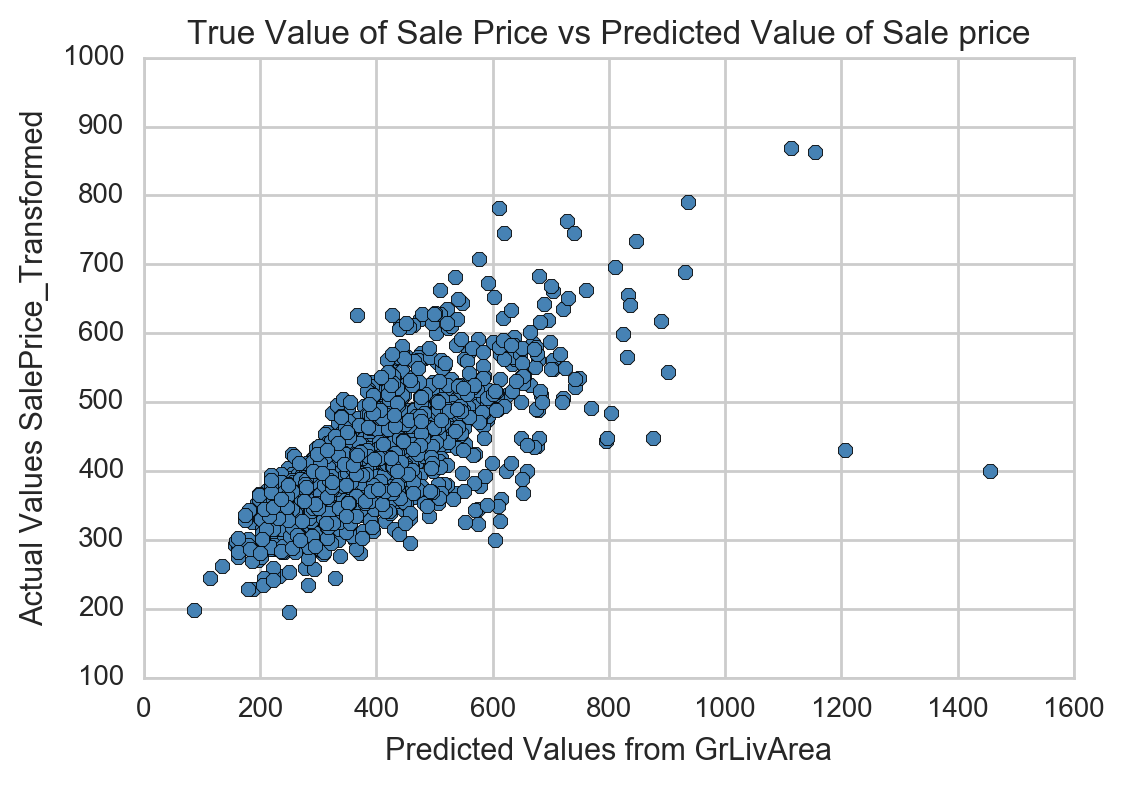

In [173]:
import statsmodels.api as sm

X_usesm = house_data["GrLivArea"]
y_usesm = house_data["SalePrice_Transformed"]

model_usesm = sm.OLS(y_usesm, X_usesm).fit()

#model_usesm = (sm.formula.ols(formula="SalePrice_Transformed ~ GrLivArea", data=house_data)).fit()

predictions_usesm = model_usesm.predict(X_usesm)

# Plot the model
plt.scatter(predictions_usesm, y_usesm, s=30, c='steelblue', marker='8', zorder=10)
plt.xlabel("Predicted Values from GrLivArea")
plt.ylabel("Actual Values SalePrice_Transformed")
plt.title("True Value of Sale Price vs Predicted Value of Sale price")
plt.show()



In [60]:
model_usesm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     SalePrice_Transformed   R-squared:                       0.946
Model:                               OLS   Adj. R-squared:                  0.946
Method:                    Least Squares   F-statistic:                 2.548e+04
Date:                   Sun, 04 Dec 2016   Prob (F-statistic):               0.00
Time:                           16:59:26   Log-Likelihood:                -8718.4
No. Observations:                   1450   AIC:                         1.744e+04
Df Residuals:                       1449   BIC:                         1.744e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GrLivArea      0.2582      0.002    159.625      0.000       0.255       0.261
==============================================================================
Omnibus:                      822.940   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15437.617
Skew:                          -2.243   Prob(JB):                         0.00
Kurtosis:                      18.343   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

In [ ]:
house_data.head(2)

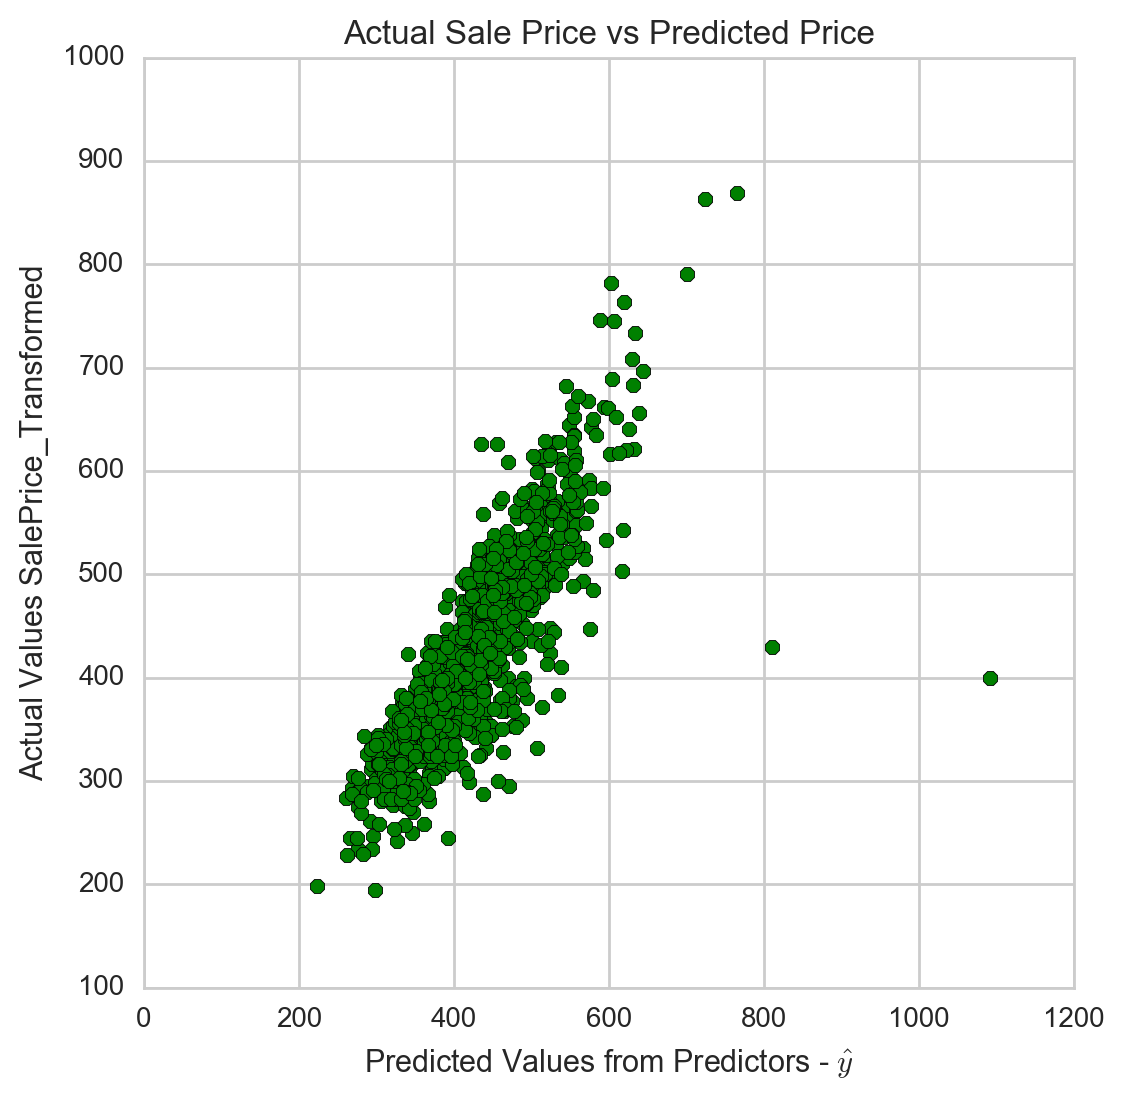

In [146]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error



lm = linear_model.LinearRegression()

X = house_data[["GrLivArea","MasVnrArea","TotalBsmtSF","1stFlrSF","GarageArea"]] 
y = house_data["SalePrice_Transformed"] 

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
#X.values[0:4], predictions[0:4]
score        =  model.score(X, y) # how accurate is our prediction. In regression, it is R^2

# Plot the model
## s = s: size in points, c = color, zorder = layer order
plt.figure(figsize=(6,6))
plt.scatter(predictions, y, s=30, c='green', marker='8', zorder=10)
plt.xlabel("Predicted Values from Predictors - $\hat{y}$")
plt.ylabel("Actual Values SalePrice_Transformed")
plt.title("Actual Sale Price vs Predicted Price")


plt.show()

### 8.2 Calculate the $R^2$ of your model.

In [62]:
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

R^2 / Variance Explained Score (1 = perfect score): 
0.696738 



### 8.3 Plot the residuals against the true values.

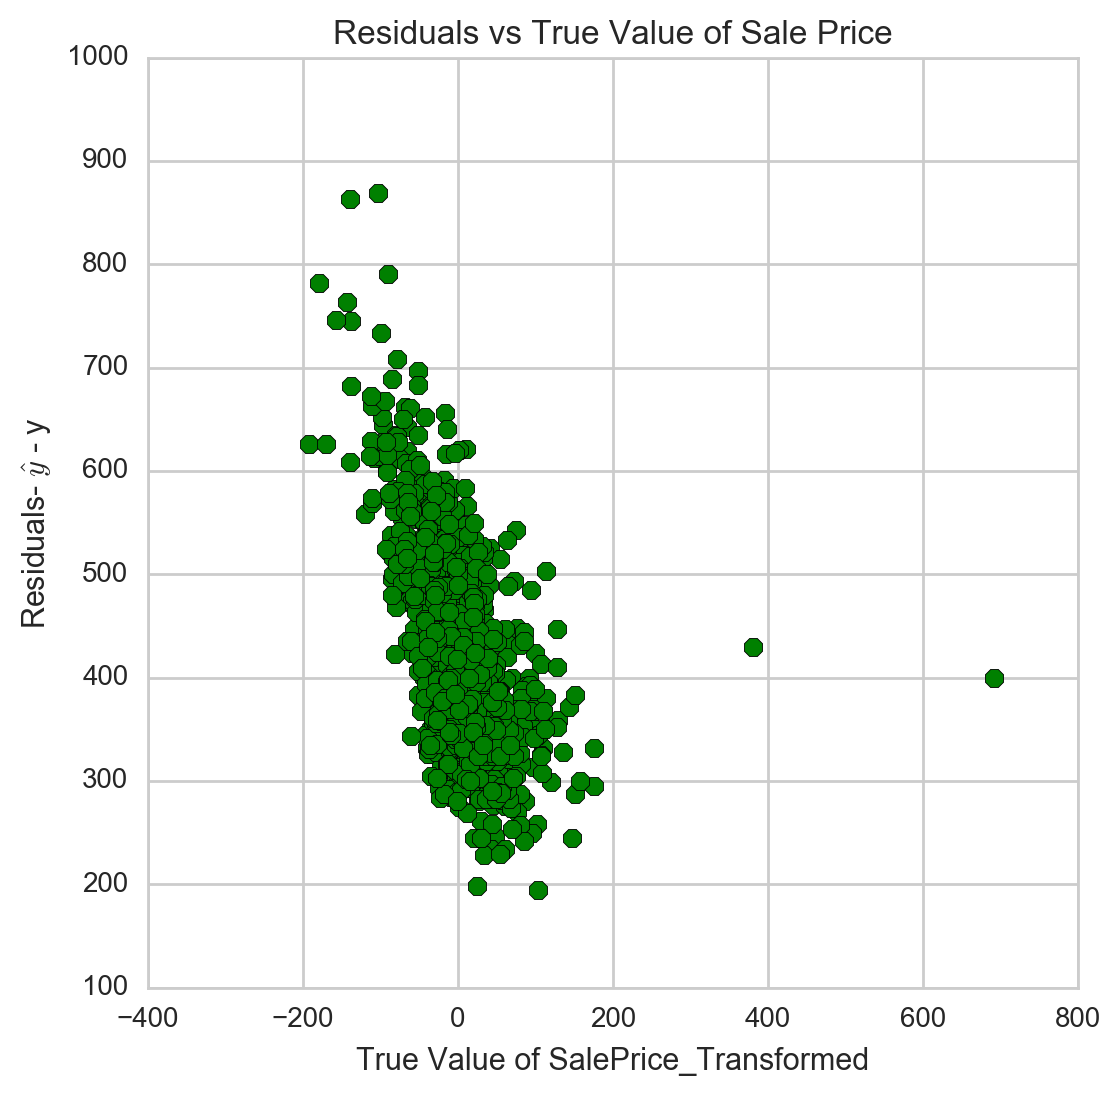

In [145]:
residuals = predictions - y
plt.figure(figsize=(6,6))
plt.scatter(residuals, y, s=50, c='green', marker='8', zorder=10)

#sns.regplot(x= 'y', y="Residuals",
            #scatter_kws={"color": 'orchid',"s":50})
plt.xlabel("True Value of SalePrice_Transformed")
plt.ylabel("Residuals- $\hat{y}$ - y")
plt.title("Residuals vs True Value of Sale Price")


plt.show()

### 8.4 Plot a histogram of the residuals.

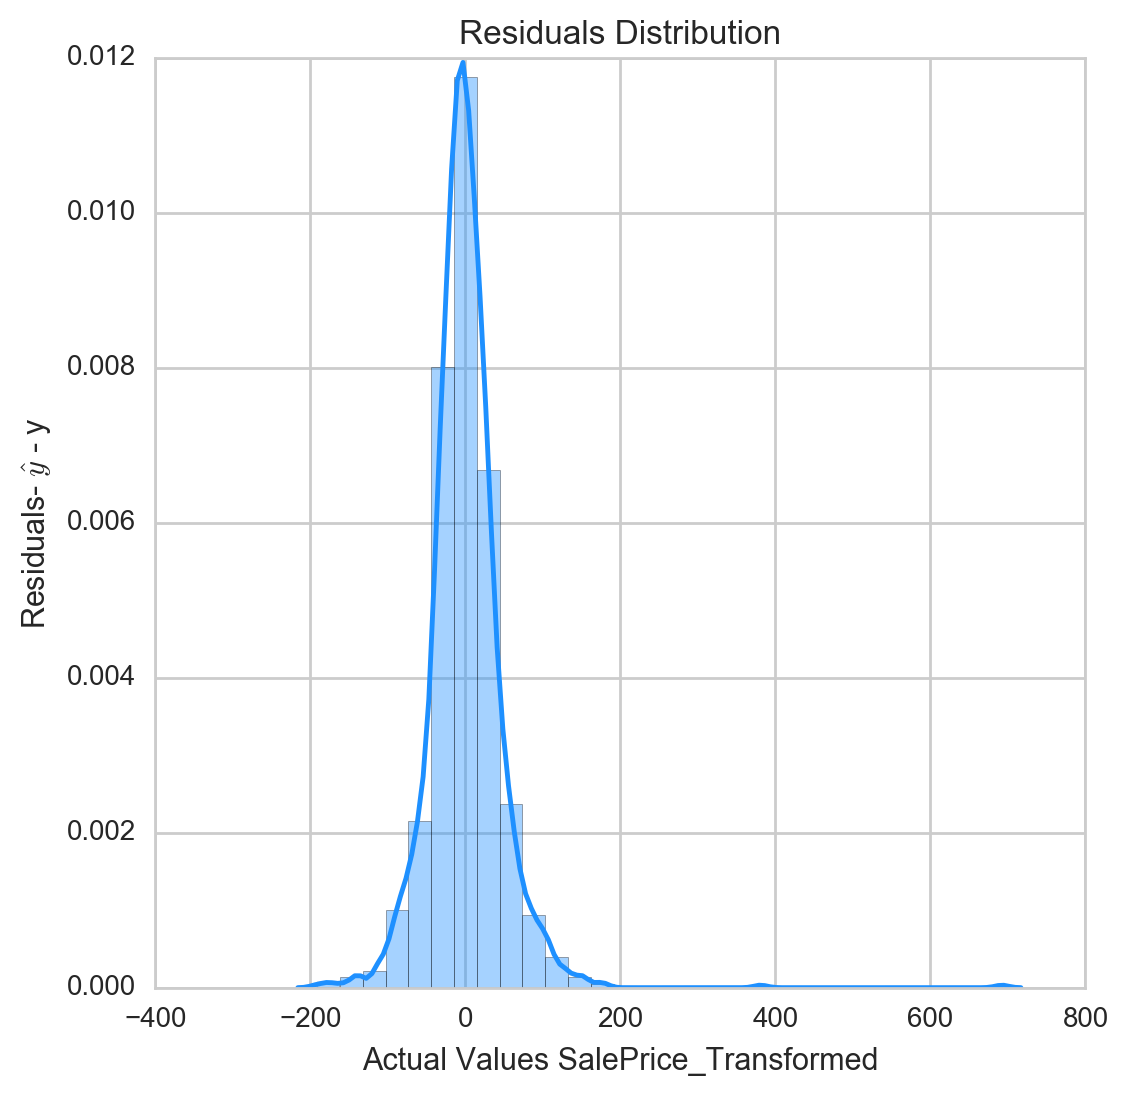

In [143]:
plt.figure(figsize=(6,6))
sns.distplot(residuals, bins = 30,color ='dodgerblue')
plt.xlabel("Actual Values SalePrice_Transformed")
plt.ylabel("Residuals- $\hat{y}$ - y")
plt.title("Residuals Distribution")
plt.show()

### 8.5 Make a plot to show the strength of the different coefficients.

In [65]:
print "COEFS:",zip(X.columns, model.coef_)

COEFS: [('GrLivArea', 0.071129129590934384), ('MasVnrArea', 0.040995915464140581), ('TotalBsmtSF', 0.055471186690028505), ('1stFlrSF', -0.011578151504004958), ('GarageArea', 0.11985287168340629)]


In [66]:
x_coeffs = zip(X.columns, model.coef_)
data = {"y":[], "Predictors":[]}
for i in range(len(x_coeffs)):
    data["y"].append(x_coeffs[i][1])
    data["Predictors"].append(x_coeffs[i][0])

data_coeff = pd.DataFrame(data)
data_coeff
#plt.plot(coeff_list)

,Predictors,y
0,GrLivArea,0.071129
1,MasVnrArea,0.040996
2,TotalBsmtSF,0.055471
3,1stFlrSF,-0.011578
4,GarageArea,0.119853


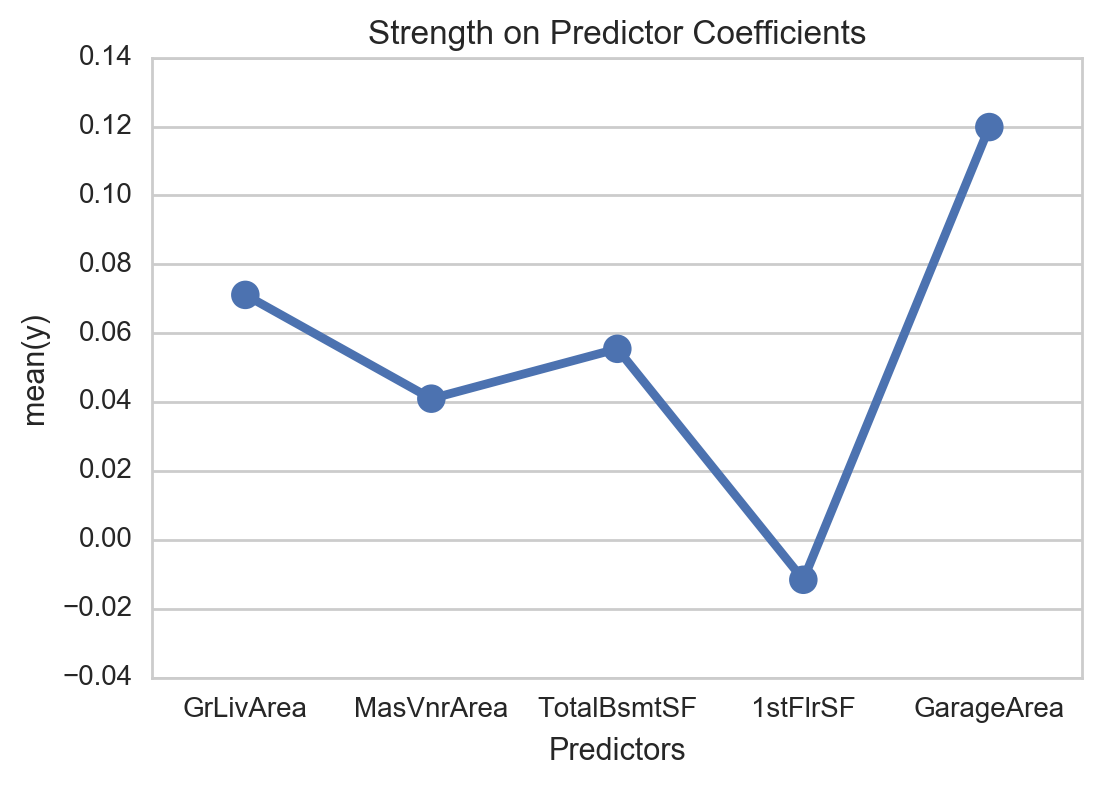

In [67]:
ax = sns.pointplot(x="Predictors", y="y", data=data_coeff)
ax.set_title("Strength on Predictor Coefficients",)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [ ]:
house_data.info()

In [68]:
import patsy

from patsy import dmatrix, demo_data, ContrastMatrix, Poly

target = house_data["SalePrice_Transformed"]

formula = 'target ~ C(OverallQual) + LotArea + TotalBsmtSF +C(KitchenQual) + BsmtFinSF1 + GrLivArea + C(FullBath) + C(GarageCars) + age + C(Fireplaces)'

y_pat,x_pat = patsy.dmatrices(formula, house_data, return_type='dataframe')

#x_pat


### 9.2 Fit a linear regression using all of the predictors and score it.

R^2 / Variance Explained Score (1 = perfect score): 
0.858539 



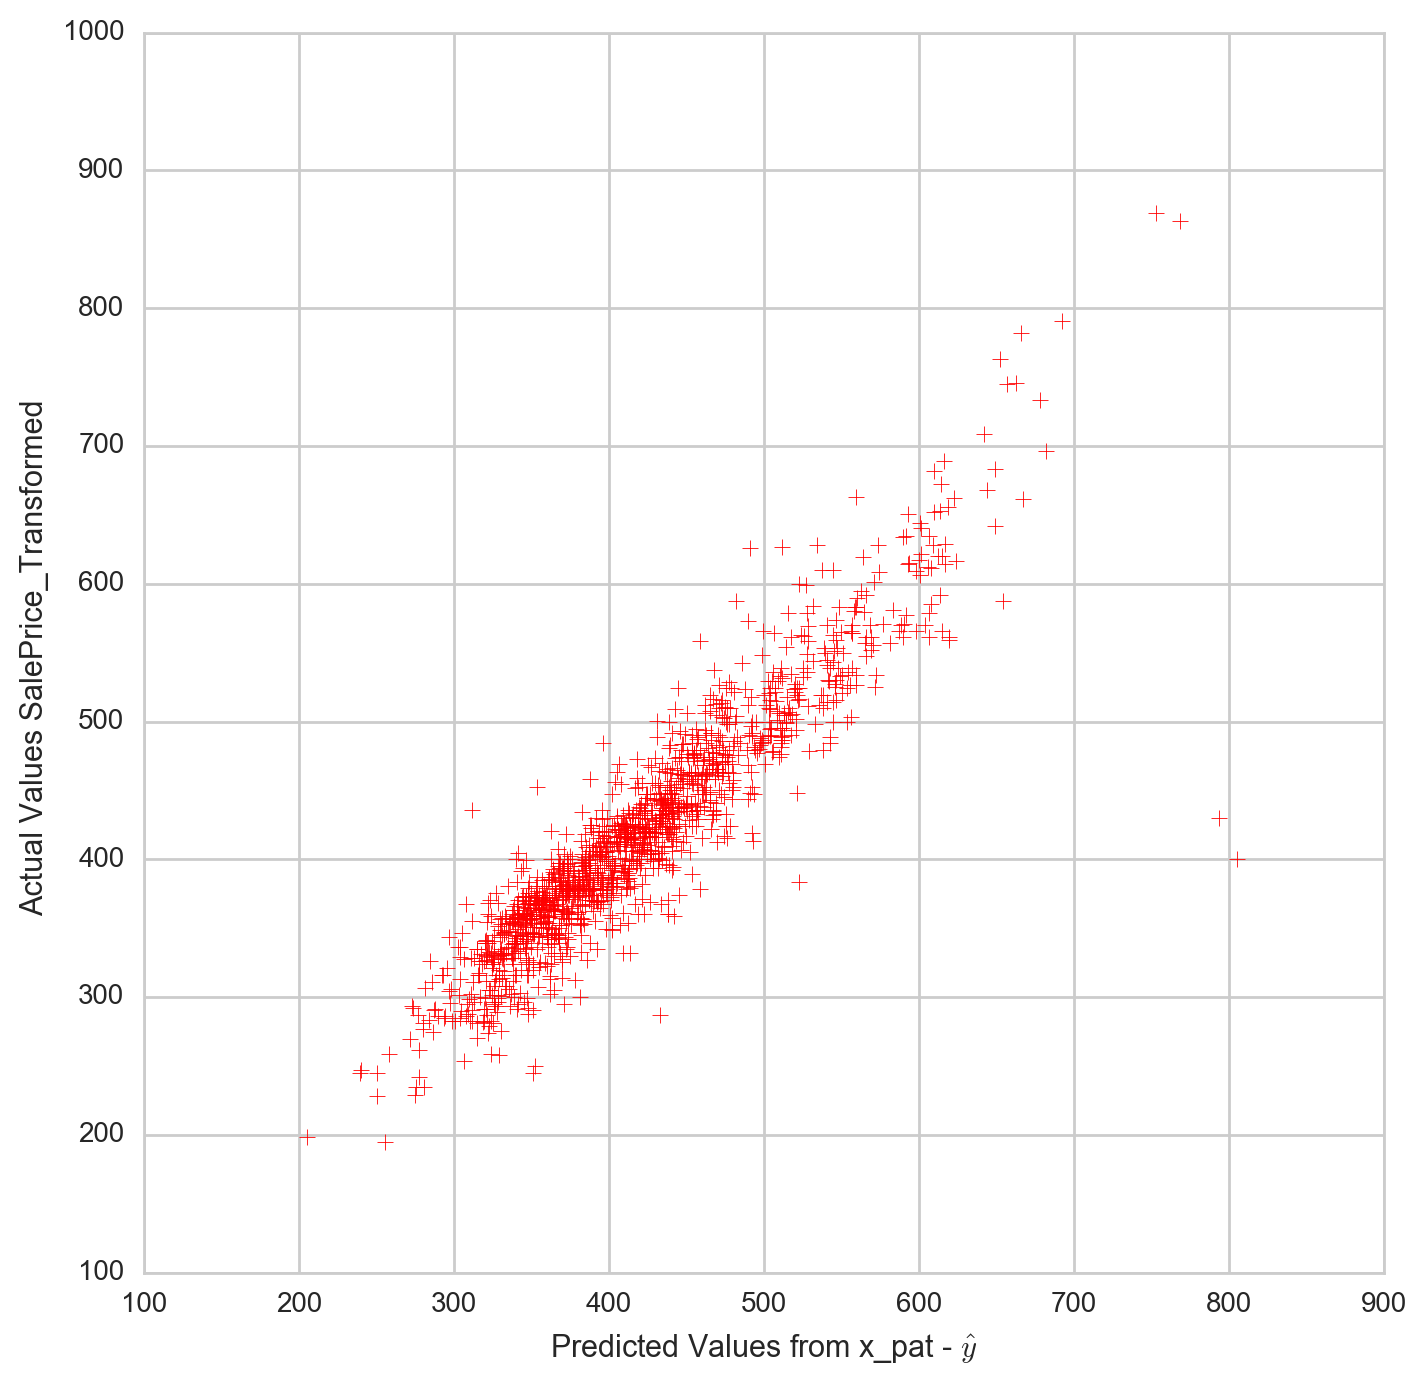

In [69]:
model_pat        =  lm.fit(x_pat, y_pat)
predictions_pat  =  model_pat.predict(x_pat)
#X.values[0:4], predictions[0:4]
score        =  model_pat.score(x_pat, y_pat) # how accurate is our prediction. In regression, it is R^2

# Plot the model
## s = s: size in points, c = color, zorder = layer order
print "R^2 / Variance Explained Score (1 = perfect score): \n%f \n" % score

plt.figure(figsize=(8,8))
plt.scatter(predictions_pat, y_pat, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from x_pat - $\hat{y}$")
plt.ylabel("Actual Values SalePrice_Transformed ")
plt.show()

### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

In [ ]:
#The R^2 is 0.858 which is high. It could be that the linear regression model could be overfitting. This indicates
# that there is high collinearity between the predictor variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

In [70]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 20-fold cross validation
lr = linear_model.LinearRegression()

model_cv = lr.fit(x_pat, y_pat)

scores = cross_val_score(model_cv, x_pat, y_pat, cv=20) 
print "Cross-validated scores:", scores

# Make cross validated predictions
predictions_cv = cross_val_predict(model_cv, x_pat, y_pat, cv=20)
# predictions


accuracy = metrics.r2_score(y_pat, predictions_cv)

print "Cross-Predicted Accuracy:", accuracy



Cross-validated scores: [ 0.89886696  0.82277042  0.82458577  0.90637319  0.90424925  0.91143215
  0.85906412  0.59084391  0.79847872  0.86289217  0.89346477  0.87574313
  0.88377838  0.89213602  0.85332913  0.89000629  0.88348914  0.01209668
  0.86256379  0.88716124]
Cross-Predicted Accuracy: 0.824905411195


In [135]:
np.mean(scores)

0.81566626138308762

### 10.2 What does the cross-validated average $R^2$ tell you?

In [ ]:
# The cross-validated R^2 of 0.816 is very close to the R^2 predicted by the linear regression model which was 0.858.
#This indicates that the linear regression model overfitted on the test data slightly. It asserts and validates that
# our previous model is good.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


In [ ]:
#R^2 is negative only when the chosen model does not follow the trend of the data, so it fits worse than a horizontal 
#line.A negative R^2 is only possible with linear regression when either the intercept or the slope are constrained 
#so that the "best-fit" line (given the constraint) fits worse than a horizontal line. 
# To conclude, a negative R^2 is not a mathematical impossibility or the sign of a computer bug. It simply means that
#the chosen model (with its constraints) fits the data really poorly.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength

---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [71]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing

In [109]:
# predictor standardization

scaler = preprocessing.StandardScaler().fit(x_pat.ix[:,:])
# perform an operation to find the mean and std for each column

#print scaler

print scaler.mean_                                      

print scaler.scale_                                       

predictors_stand =  scaler.transform(x_pat.ix[:,:]) 


[  1.00000000e+00   1.37931034e-03   1.24137931e-02   7.65517241e-02
   2.73103448e-01   2.57241379e-01   2.20000000e-01   1.15862069e-01
   2.96551724e-02   1.24137931e-02   2.55172414e-02   4.04137931e-01
   5.01379310e-01   4.42758621e-01   5.28965517e-01   2.27586207e-02
   2.51034483e-01   5.66896552e-01   1.24137931e-01   3.44827586e-03
   4.47586207e-01   7.93103448e-02   3.44827586e-03   1.05238317e+04
   1.05940897e+03   4.45162759e+02   1.51769862e+03   3.62193103e+01]
[  1.00000000e+00   3.71134456e-02   1.10723488e-01   2.65878840e-01
   4.45553538e-01   4.37113546e-01   4.14246304e-01   3.20059448e-01
   1.69634145e-01   1.10723488e-01   1.57689923e-01   4.90724427e-01
   4.99998097e-01   4.96712618e-01   4.99160294e-01   1.49133048e-01
   4.33608315e-01   4.95504643e-01   3.29738844e-01   5.86206897e-02
   4.97245205e-01   2.70222527e-01   5.86206897e-02   1.00087323e+04
   4.39055845e+02   4.56196480e+02   5.24973088e+02   3.00536791e+01]


### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [79]:
lasso_cv = LassoCV(n_alphas =200, cv=10, verbose=1)
lasso_cv.fit(predictors_stand,y_pat)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=1)

In [80]:
lasso_cv.alpha_

0.23544502404889767

In [81]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(predictors_stand,y_pat)

Lasso(alpha=0.23544502404889767, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
lasso_scores = cross_val_score(lasso, predictors_stand, y_pat, cv= 10)
lasso_scores

array([ 0.87167385,  0.86327107,  0.90684541,  0.75043062,  0.8305423 ,
        0.88253321,  0.89106618,  0.86912668,  0.57603291,  0.87157614])

In [83]:
np.mean(lasso_scores)

0.83130983588151786

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

In [ ]:
#Lasso : Shrinks features as well as selects them(evaluating some of the feature co-efficients to 0).It identifies a
#relevant subset of the covariates with which to predict.Further, by zeroing out some of the covariates, it provides 
#interpretable (as in, sparse) models.Sparse models can also be important in real systems that might depend on many 
#inputs. Once the sparse solution is found, we need only measure a few of the inputs in order to make predictions. 
#This speeds up the performance of the system. However, the coefficients (and thus feature ranks) can vary 
#significantly even on small data changes when there are correlated features in the data.

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

In [86]:
np.sum(lasso.coef_ == 0)

4

In [87]:
lasso_coefs = pd.DataFrame({
        'variable': x_pat.columns,
        'coef': lasso.coef_,
        'abs_coef':np.abs(lasso.coef_)
        
    })

In [88]:
lasso_coefs.sort_values('abs_coef', ascending = False, inplace=True)



In [140]:
#non zero coefficients

lasso_coefs[lasso_coefs['coef'] != 0].shape

,abs_coef,coef,variable
26,24.355347,24.355347,GrLivArea
18,15.708547,15.708547,C(GarageCars)[T.3]
8,15.038688,15.038688,C(OverallQual)[T.9]
7,14.865410,14.865410,C(OverallQual)[T.8]
12,14.299532,-14.299532,C(KitchenQual)[T.TA]
27,12.537126,-12.537126,age
17,10.564959,10.564959,C(GarageCars)[T.2]
9,8.165141,8.165141,C(OverallQual)[T.10]
25,7.848863,7.848863,BsmtFinSF1
6,7.582760,7.582760,C(OverallQual)[T.7]


In [141]:
lasso_coefs[lasso_coefs['coef'] != 0].shape

(24, 3)

In [ ]:
# 24 non-zero variable remain.

# Our goal is to predict price of the house based on given data. From the above dataframe, we find that the total
# living area has the highest co-efficient and thus it affects the house price significantly. Second to the total
#living area, we find that a "3- car garage" is also a key determinant of the price.
# A high 'Overall Quality' of the house is another strong contender for predicting price.

#What surprises me however is that a Kitchen Quality of "Typical/Average" rating is one of the top 5 key determinants
#of house price. Again, the price of a house with "4 car Garage" would not be affected by the number of garages
#significantly. The price of a house with "3 Full Baths" also is not affected significantly by the number of
#bathrooms int he house.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

In [95]:
#house.info()

In [119]:
house2 = house[house['MSZoning'] != 'C (all)']
house2.shape

(1450, 83)

In [126]:
predictors_ridge = house2[['LotArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','1stFlrSF','2ndFlrSF',
                         'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                         '3SsnPorch','ScreenPorch','PoolArea']]
predictors_ridge.shape
# predictor standardization

scaler_ridge = preprocessing.StandardScaler().fit(predictors_ridge.ix[:,:])
# perform an operation to find the mean and std for each column

#print scaler_ridge

print scaler_ridge.mean_                                      

print scaler_ridge.scale_                                       

predictors_ridge_stand =  scaler_ridge.transform(predictors_ridge.ix[:,:]) 

# #predictors_ridge_stand




[  1.05238317e+04   4.45162759e+02   4.68703448e+01   1.05940897e+03
   5.67375862e+02   1.16477310e+03   3.47394483e+02   5.53103448e+00
   1.51769862e+03   4.73277931e+02   9.48268966e+01   4.65379310e+01
   2.15365517e+01   3.43310345e+00   1.50965517e+01   2.77793103e+00]
[ 10008.73228153    456.19648035    161.77264511    439.05584476
    442.43233666    386.51274534    436.94351277     46.91677961
    524.97308785    212.61426785    125.51755902     65.20026663
     60.81784313     29.40680206     55.87412258     40.3011465 ]


### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

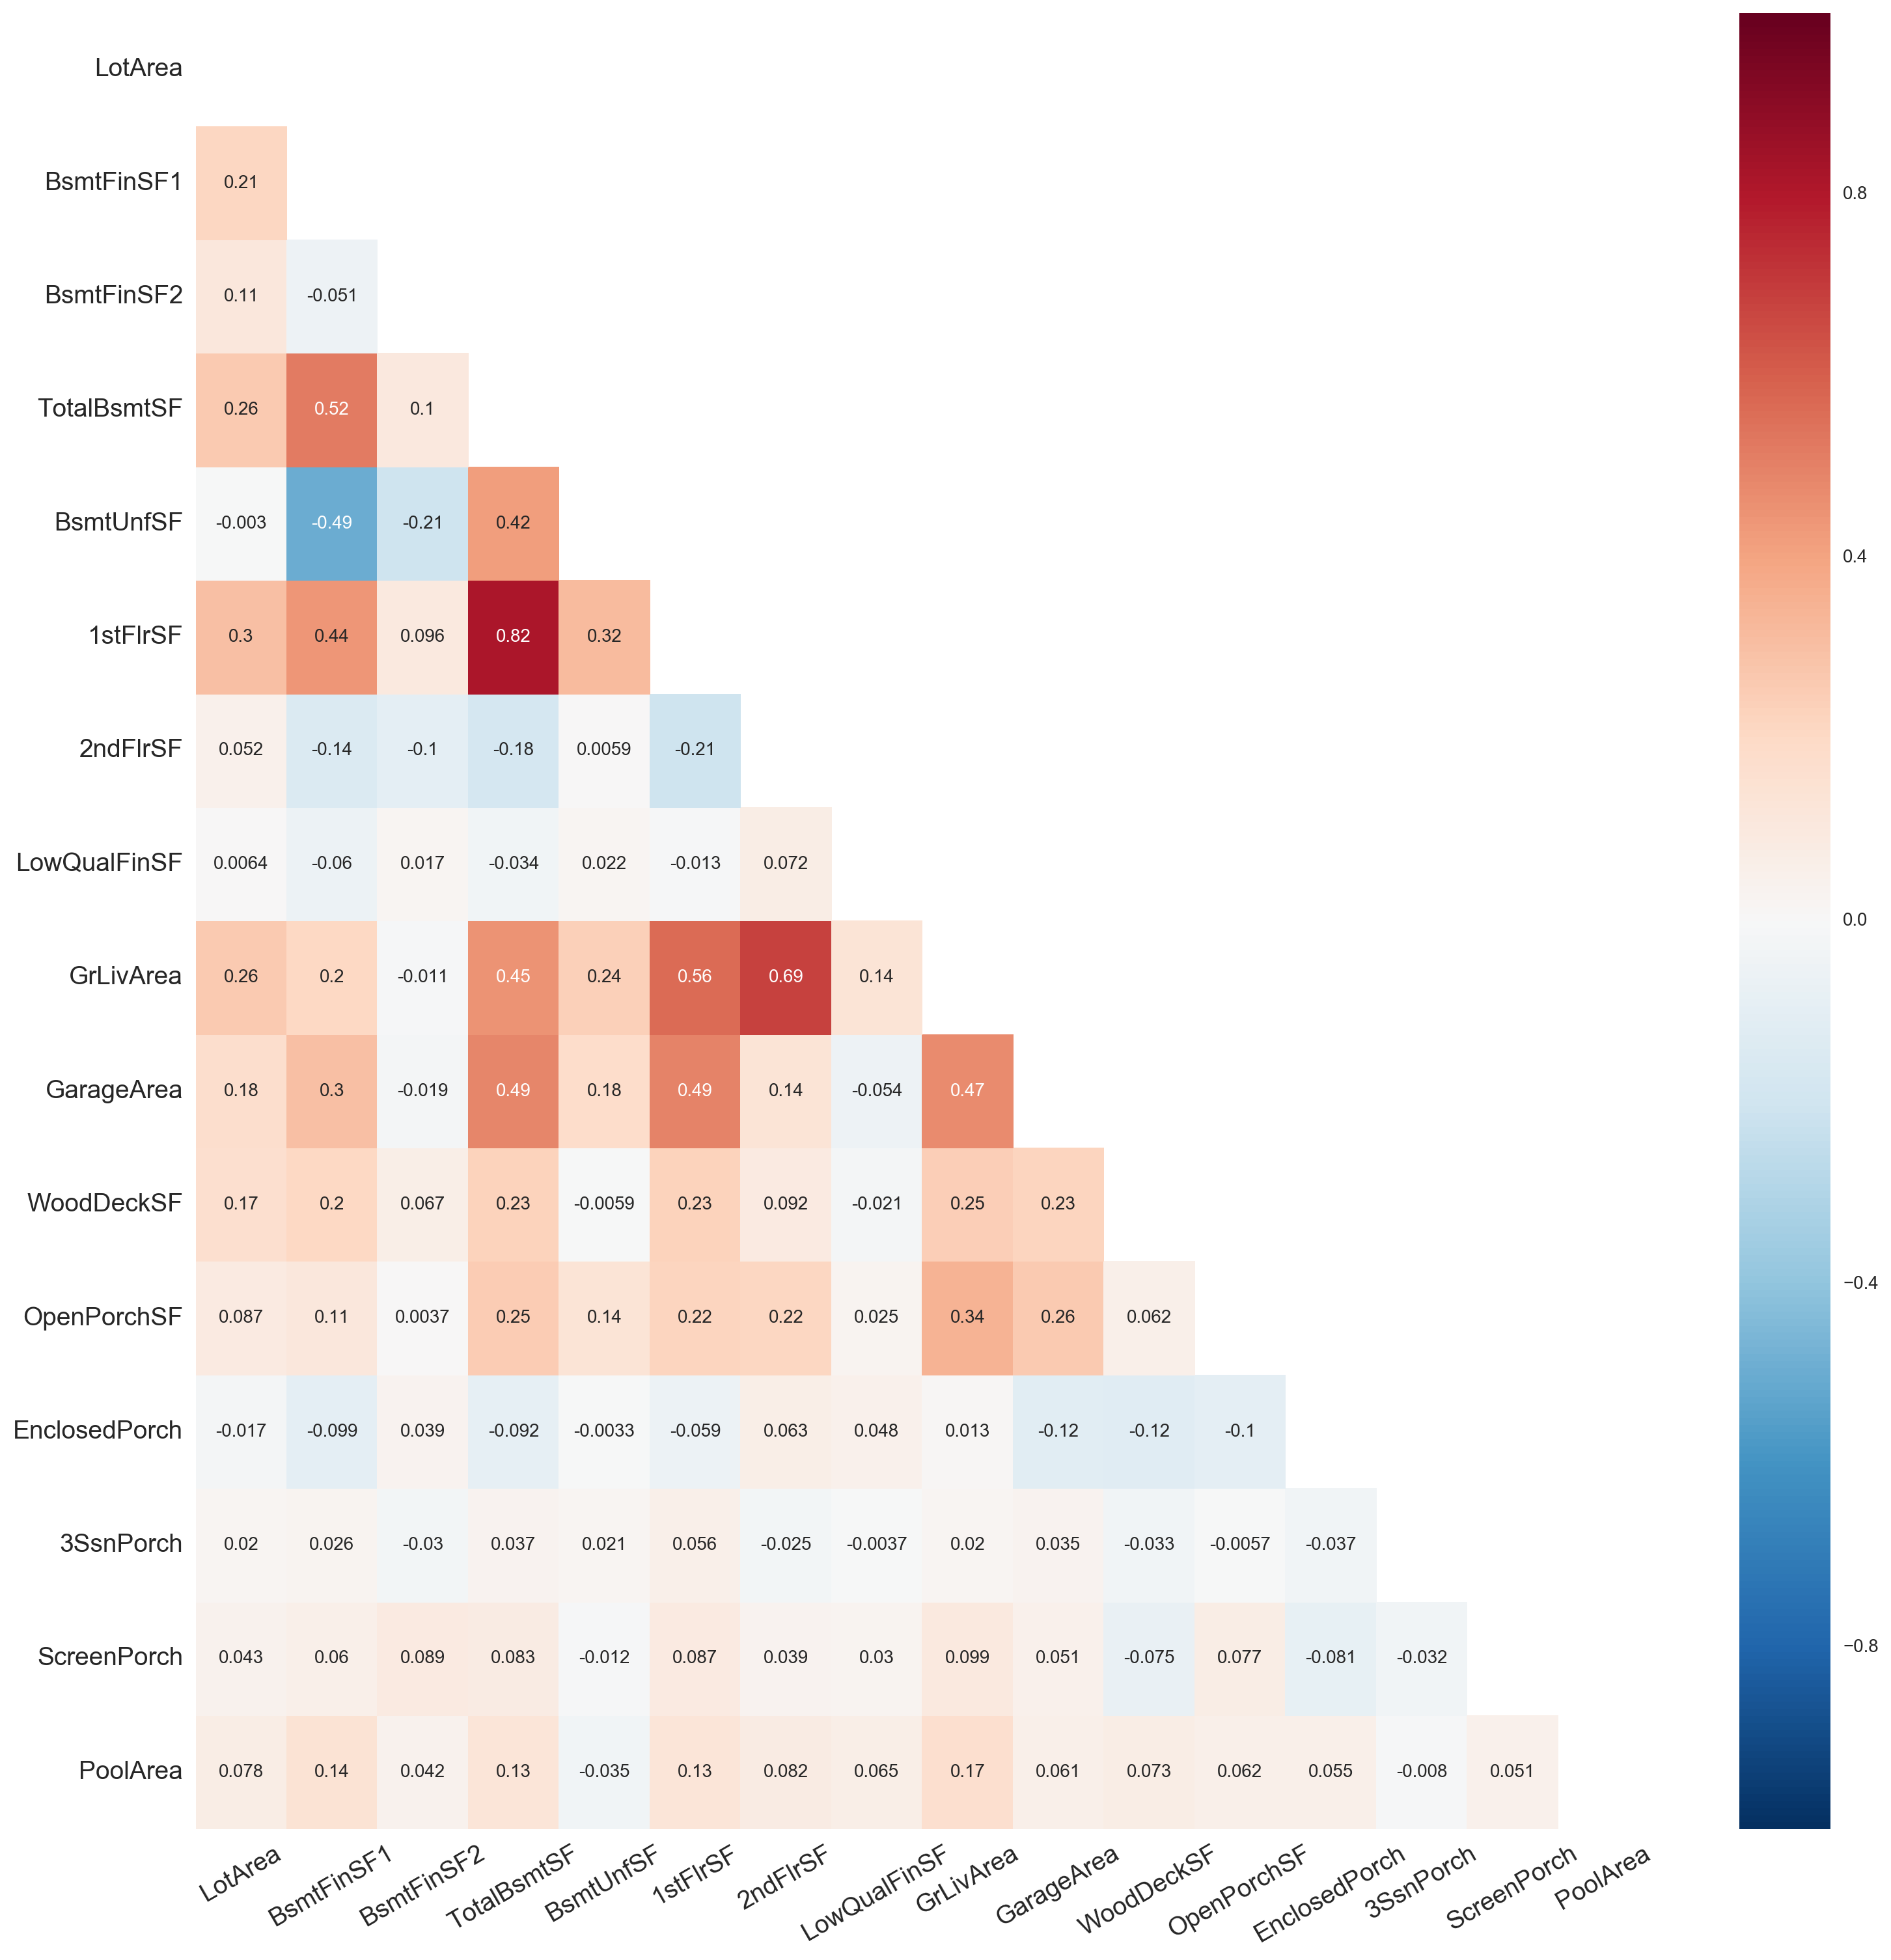

In [127]:
def correlation_heat_map(predictors_ridge):
    corrs = predictors_ridge.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(18,18))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
    
correlation_heat_map(predictors_ridge)

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



In [128]:
alphas = np.logspace(-1, 5, 200)

In [129]:
ridge_cv = RidgeCV(alphas = alphas , cv= 10)

In [130]:
ridge_cv.fit(predictors_ridge_stand,y_pat)



RidgeCV(alphas=array([  1.00000e-01,   1.07189e-01, ...,   9.32930e+04,   1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [131]:
ridge_cv.alpha_ 



222.19468609395238

In [132]:
optimal_ridge = Ridge(alpha=ridge_cv.alpha_)
ridge_scores = cross_val_score(optimal_ridge, X, y, cv =5)
optimal_ridge.fit(predictors_ridge_stand,y_pat)

Ridge(alpha=222.19468609395238, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [133]:
#ridge_scores

array([ 0.78435144,  0.71551966,  0.74565422,  0.71763729,  0.45305674])

In [139]:
np.mean(ridge_scores)

0.68324386932067793

### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

In [137]:
#calculating the R^2 score for a standard Linear Regression


linreg = linear_model.LinearRegression()

model_cvr = linreg.fit(predictors_ridge_stand,y_pat)

scores_cvr = cross_val_score(model_cvr, predictors_ridge_stand, y_pat, cv=20) 
print "Cross-validated scores:", scores_cvr

# Make cross validated predictions
predictions_cvr = cross_val_predict(model_cvr, predictors_ridge_stand, y_pat, cv=20)
# predictions


#accuracy = metrics.r2_score(y_pat, predictions_cvr)

#print "Cross-Predicted Accuracy:", accuracy



Cross-validated scores: [ 0.81600621  0.73706077  0.79353039  0.83115812  0.79084671  0.79536685
  0.80400996  0.5014793   0.80763674  0.74187164  0.82414768  0.62204117
  0.62371637  0.78156705  0.67563023  0.78824109  0.64212535 -0.92123538
  0.79863114  0.66740875]


In [138]:
np.mean(scores_cvr)

0.65606200661120317

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

In [ ]:
##The use cases for Ridge and Lasso regularization are as following:

#Why reglarization  - When there are multiple (linearly) correlated features (as is the case with very many real
#life datasets),the model becomes unstable, meaning that small changes in the data can cause large changes in the 
#model (i.e. coefficient values), making model interpretation very difficult (so called Multicollinearity Problem). 

#Ridge : It is primarily used to prevent overfitting. It shrinks features but includes all of them, it is not very 
#useful in case of very high number of features, say in millions, as it will pose computational challenges.However,
#the models are much more stable (coefficients do not fluctuate on small data changes as is the case with 
#unregularized or L1 models). So while L2 regularization does not perform feature selection the same way as Lasso does,
#it is more useful for feature *interpretation*: a predictive feature will get a non-zero coefficient, which is 
#often not the case with Lasso.

#Lasso : It provides sparse solutions, it is used for modelling cases where the number of features are in millions or 
#more.In such a case, getting a sparse solution is of great computational advantage as the features with zero 
#coefficients can simply be ignored.

## Effects on co-efficents:

#Ridge : Shrinks the co-efficients but keeps all of them. It brings them closer to zero and closer to each other.

#Lasso : Shrinks features as well as selects them(evaluating some of the feature co-efficients to 0). #It identifies a
#relevant subset of the covariates with which to predict.Further, by zeroing out some of the covariates, it provides 
#interpretable (as in, sparse) models.Sparse models can also be important in real systems that might depend on many 
#inputs. Once the sparse solution is found, we need only measure a few of the inputs in order to make predictions. 
#This speeds up the performance of the system.

## Effects on Bias and Variance:

#Ridge : Variance goes up and bias gows down.
#Lasso : It trades off an increase in bias for a decrease in variance.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**